In [1]:
#pip install wordcloud

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60!important; }</style>"))
LFIGSIZE=(2,8)
FIGSIZE=(14,8)
FIGSIZE2=(20,8)
FIGSIZE3=(30,12)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import re

vaerd_1 = pd.read_csv('data/2021VAERSData_0820/2021VAERSDATA.csv', encoding='latin1')
vaerv_1 = pd.read_csv('data/2021VAERSData_0820/2021VAERSVAX.csv', encoding='latin1')
vaers_1 = pd.read_csv('data/2021VAERSData_0820/2021VAERSSYMPTOMS.csv', encoding='latin1')

vaerd_2 = pd.read_csv('data/NonDomesticVAERSData_0820/NonDomesticVAERSDATA.csv', encoding='latin1')
vaerv_2 = pd.read_csv('data/NonDomesticVAERSData_0820/NonDomesticVAERSVAX.csv', encoding='latin1')
vaers_2 = pd.read_csv('data/NonDomesticVAERSData_0820/NonDomesticVAERSSYMPTOMS.csv', encoding='latin1')

vaerd = pd.concat([vaerd_1, vaerd_2])
vaerv = pd.concat([vaerv_1, vaerv_2])
vaers = pd.concat([vaers_1, vaers_2])

v2020 = pd.read_csv('data/2020VAERSVAX.csv', encoding='latin1')

vacdist = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', parse_dates=['date'])
pd.set_option('display.max_columns', None)
vaers.head()

/home/wwang/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,12,15,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/wwang/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,12,23,30,31,32,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


VAERS_ID                 SYMPTOM1  SYMPTOMVERSION1  \
0    916600                Dysphagia             23.1   
1    916601                  Anxiety             23.1   
2    916602         Chest discomfort             23.1   
3    916603                Dizziness             23.1   
4    916604  Injection site erythema             23.1   

                  SYMPTOM2  SYMPTOMVERSION2                 SYMPTOM3  \
0             Epiglottitis             23.1                      NaN   
1                 Dyspnoea             23.1                      NaN   
2                Dysphagia             23.1        Pain in extremity   
3                  Fatigue             23.1       Mobility decreased   
4  Injection site pruritus             23.1  Injection site swelling   

   SYMPTOMVERSION3               SYMPTOM4  SYMPTOMVERSION4 SYMPTOM5  \
0              NaN                    NaN              NaN      NaN   
1              NaN                    NaN              NaN      NaN   
2             23.1      Visual impairment             23.1      NaN   
3             23.1                    NaN              NaN      NaN   
4             23.1  Injection site warmth             23.1      NaN   

   SYMPTOMVERSION5  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN

In [3]:
vaerd_1.describe()


VAERS_ID        AGE_YRS        CAGE_YR      CAGE_MO      HOSPDAYS  \
count  4.608640e+05  426202.000000  388572.000000  1344.000000  19347.000000   
mean   1.204177e+06      48.662626      48.248757     0.146801     15.480333   
std    1.760459e+05      18.535440      18.663447     0.232161   1016.722357   
min    9.166000e+05       0.000000       0.000000     0.000000      1.000000   
25%    1.054845e+06      34.000000      34.000000     0.000000      2.000000   
50%    1.196546e+06      49.000000      48.000000     0.000000      3.000000   
75%    1.341466e+06      63.000000      63.000000     0.200000      5.000000   
max    1.553448e+06     119.000000     120.000000     1.000000  99999.000000   

             NUMDAYS      FORM_VERS  
count  421172.000000  460864.000000  
mean       22.600223       1.999147  
std       626.963804       0.029189  
min         0.000000       1.000000  
25%         0.000000       2.000000  
50%         1.000000       2.000000  
75%         4.000000       2.000000  
max     36896.000000       2.000000

In [4]:
vaerd_2.describe()

VAERS_ID        AGE_YRS       CAGE_YR       CAGE_MO      HOSPDAYS  \
count  2.304810e+05  127179.000000  29618.000000  13318.000000  16137.000000   
mean   9.802445e+05      32.458118     16.981261      0.341027      4.581521   
std    4.300182e+05      26.805173     22.155135      0.223125     17.216377   
min    2.500200e+04       0.000000      0.000000      0.000000      0.000000   
25%    5.947900e+05       4.000000      0.000000      0.200000      0.000000   
50%    1.065037e+06      30.000000      5.000000      0.300000      2.000000   
75%    1.393124e+06      53.000000     29.000000      0.400000      5.000000   
max    1.553455e+06     109.000000    100.000000      1.000000   1096.000000   

             NUMDAYS      FORM_VERS  
count  173175.000000  230481.000000  
mean       31.180032       1.668450  
std       246.209053       0.470771  
min         0.000000       1.000000  
25%         0.000000       1.000000  
50%         1.000000       2.000000  
75%         6.000000       2.000000  
max     16443.000000       2.000000

In [5]:
vaerd[vaerd.eq("Barre").any(1)]

Empty DataFrame
Columns: [VAERS_ID, RECVDATE, STATE, AGE_YRS, CAGE_YR, CAGE_MO, SEX, RPT_DATE, SYMPTOM_TEXT, DIED, DATEDIED, L_THREAT, ER_VISIT, HOSPITAL, HOSPDAYS, X_STAY, DISABLE, RECOVD, VAX_DATE, ONSET_DATE, NUMDAYS, LAB_DATA, V_ADMINBY, V_FUNDBY, OTHER_MEDS, CUR_ILL, HISTORY, PRIOR_VAX, SPLTTYPE, FORM_VERS, TODAYS_DATE, BIRTH_DEFECT, OFC_VISIT, ER_ED_VISIT, ALLERGIES]
Index: []

In [6]:
vacdist.head(1)

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          1.0        1.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.026                  0.026   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   

   weekly_hosp_admissions_per_million  new_tests  total_tests  \
0                                 NaN        NaN          NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_thousand  positive_rate  tests_per_case tests_units  \
0                              NaN            NaN             NaN         NaN   

   total_vaccinations  people_vaccinated  people_fully_vaccinated  \
0                 NaN                NaN                      NaN   

   total_boosters  new_vaccinations  new_vaccinations_smoothed  \
0             NaN               NaN                        NaN   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
0                                  NaN                         NaN   

   new_vaccinations_smoothed_per_million  stringency_index  population  \
0                                    NaN              8.33  38928341.0   

   population_density  median_age  aged_65_older  aged_70_older  \
0              54.422        18.6          2.581          1.337   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   

   excess_mortality  
0               NaN

In [7]:
usv = pd.DataFrame()
us = vacdist[vacdist['iso_code']=='USA']
usv[['date', 'new_vaccinations']] = us[['date','new_vaccinations']]
usv.fillna(0,inplace=True)
usv

date  new_vaccinations
105283 2020-01-22               0.0
105284 2020-01-23               0.0
105285 2020-01-24               0.0
105286 2020-01-25               0.0
105287 2020-01-26               0.0
...           ...               ...
105856 2021-08-17          602938.0
105857 2021-08-18          704840.0
105858 2021-08-19         1023545.0
105859 2021-08-20         1010907.0
105860 2021-08-21         1050277.0

[578 rows x 2 columns]

In [8]:
us['new_vaccinations'].sum()

347030222.0

In [9]:
vaerd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691345 entries, 0 to 230480
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      691345 non-null  int64  
 1   RECVDATE      691345 non-null  object 
 2   STATE         639917 non-null  object 
 3   AGE_YRS       553381 non-null  float64
 4   CAGE_YR       418190 non-null  float64
 5   CAGE_MO       14662 non-null   float64
 6   SEX           691345 non-null  object 
 7   RPT_DATE      76157 non-null   object 
 8   SYMPTOM_TEXT  691232 non-null  object 
 9   DIED          17038 non-null   object 
 10  DATEDIED      12997 non-null   object 
 11  L_THREAT      17745 non-null   object 
 12  ER_VISIT      7920 non-null    object 
 13  HOSPITAL      94557 non-null   object 
 14  HOSPDAYS      35484 non-null   float64
 15  X_STAY        2148 non-null    object 
 16  DISABLE       24899 non-null   object 
 17  RECOVD        642745 non-null  object 
 18  VAX_

In [10]:
vaers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979020 entries, 0 to 360540
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         979020 non-null  int64  
 1   SYMPTOM1         979020 non-null  object 
 2   SYMPTOMVERSION1  979020 non-null  float64
 3   SYMPTOM2         794271 non-null  object 
 4   SYMPTOMVERSION2  794271 non-null  float64
 5   SYMPTOM3         632873 non-null  object 
 6   SYMPTOMVERSION3  632873 non-null  float64
 7   SYMPTOM4         492599 non-null  object 
 8   SYMPTOMVERSION4  492599 non-null  float64
 9   SYMPTOM5         376874 non-null  object 
 10  SYMPTOMVERSION5  376874 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 89.6+ MB


In [11]:
vaerd['VAERS_ID'].isnull().sum() + vaerv['VAERS_ID'].isnull().sum() + vaers['VAERS_ID'].isnull().sum()

0

In [12]:
# Build Dirty Frame _ Large Reports * Doulicated Vaers_ID's
Dvaers = vaers
Dvaerv = vaerv
Dvaerd = vaerd


In [13]:

D_V_CDC = Dvaerd.merge(Dvaerv, on = 'VAERS_ID', how = 'inner')
D_V_CDC = D_V_CDC.merge(Dvaers, on = 'VAERS_ID', how = 'inner')
    

In [14]:
D_V_CDC = D_V_CDC.applymap(lambda s:s.upper() if type(s) == str else s)

In [15]:
type(D_V_CDC['SYMPTOM_TEXT'])

pandas.core.series.Series

In [16]:
D_V_CDC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087216 entries, 0 to 1087215
Data columns (total 52 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   VAERS_ID         1087216 non-null  int64  
 1   RECVDATE         1087216 non-null  object 
 2   STATE            1023371 non-null  object 
 3   AGE_YRS          872681 non-null   float64
 4   CAGE_YR          635289 non-null   float64
 5   CAGE_MO          47771 non-null    float64
 6   SEX              1087216 non-null  object 
 7   RPT_DATE         180202 non-null   object 
 8   SYMPTOM_TEXT     1087100 non-null  object 
 9   DIED             30769 non-null    object 
 10  DATEDIED         23890 non-null    object 
 11  L_THREAT         40926 non-null    object 
 12  ER_VISIT         23710 non-null    object 
 13  HOSPITAL         230332 non-null   object 
 14  HOSPDAYS         98271 non-null    float64
 15  X_STAY           4789 non-null     object 
 16  DISABLE          5

In [17]:
THROM = D_V_CDC[D_V_CDC.eq('THROMBOCYTOPENIA').any(1)]
THROM['AGE_YRS'].astype(float)

10349      43.0
23037      25.0
24373      43.0
26094      44.0
37793      43.0
           ... 
1085744     NaN
1085997     NaN
1086385    63.0
1087034     NaN
1087188     NaN
Name: AGE_YRS, Length: 2868, dtype: float64

In [18]:
def ana_disease(df : pd.DataFrame, disease : str):
    df_disease = df[df.eq(disease.upper()).any(1)]
    df_disease['AGE_YRS'].astype(float)
    fig = plt.figure()
    sns.set(font_scale = (2))
    plt.style.use('dark_background')
    ax0 = plt.subplot2grid((1,5), (0,0), colspan=1)
    ax1 = plt.subplot2grid((1,5), (0,1), colspan=4)
    df_disease['AGE_YRS'].plot(kind='box', figsize=LFIGSIZE, ax=ax0, boxprops=dict(linestyle='-', linewidth=4, color='r'), 
                    medianprops=dict(linestyle='-', linewidth=4),
                    whiskerprops=dict(linestyle='-', linewidth=4, color='g'), 
                    capprops=dict(linestyle='-', linewidth=4),)
    df_disease['AGE_YRS'].plot(kind='hist', bins=30, figsize=FIGSIZE, edgecolor='r', linewidth=2,ax=ax1)
    ax0.set_title('Average Age')
    ax1.set_title( disease.capitalize() + ' Reactions by Age')
    fig.tight_layout()

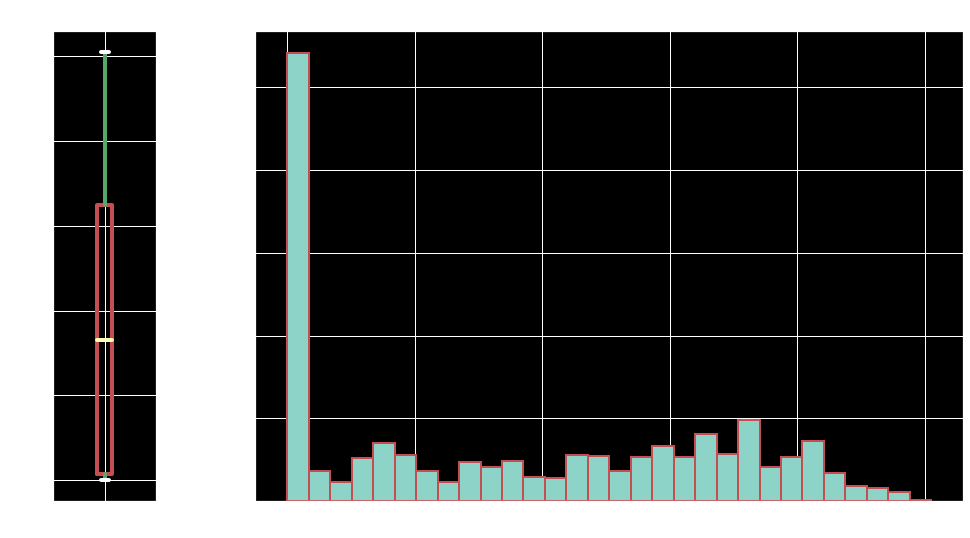

In [19]:
ana_disease(D_V_CDC, 'THROMBOCYTOPENIA') # THROMBOCYTOPENIA')

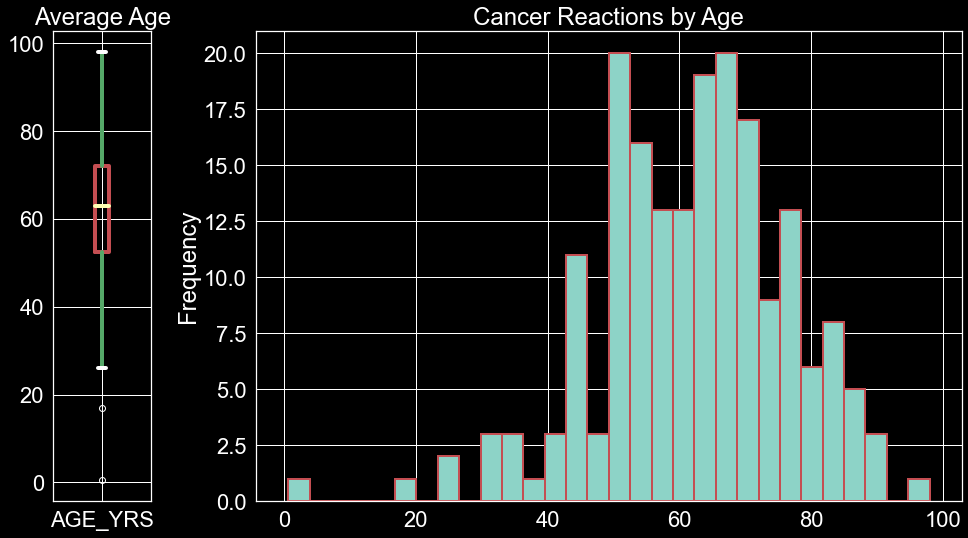

In [20]:
ana_disease(D_V_CDC, 'CANCER') # CANCER')

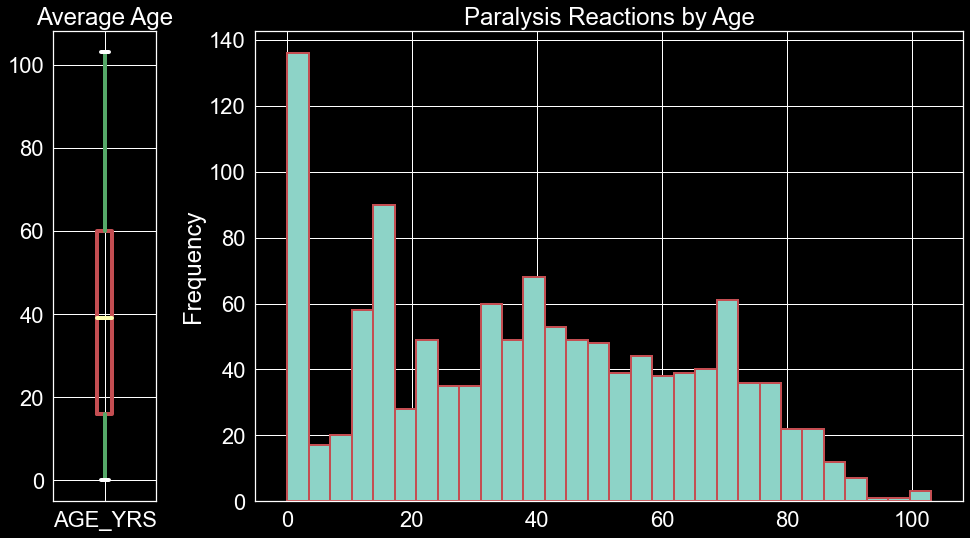

In [21]:
ana_disease(D_V_CDC, 'PARALYSIS') # THROMBOCYTOPENIA')

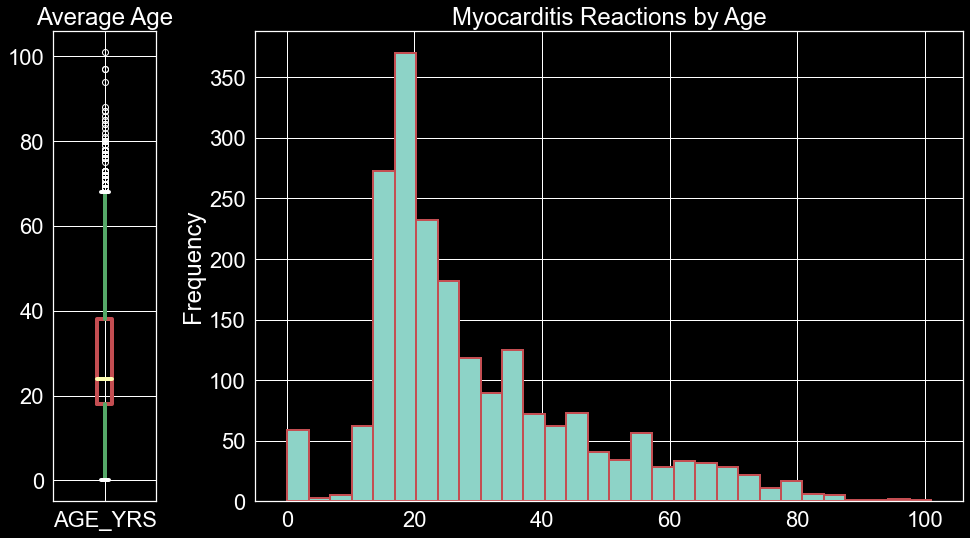

In [22]:
ana_disease(D_V_CDC, 'MYOCARDITIS') # THROMBOCYTOPENIA') 

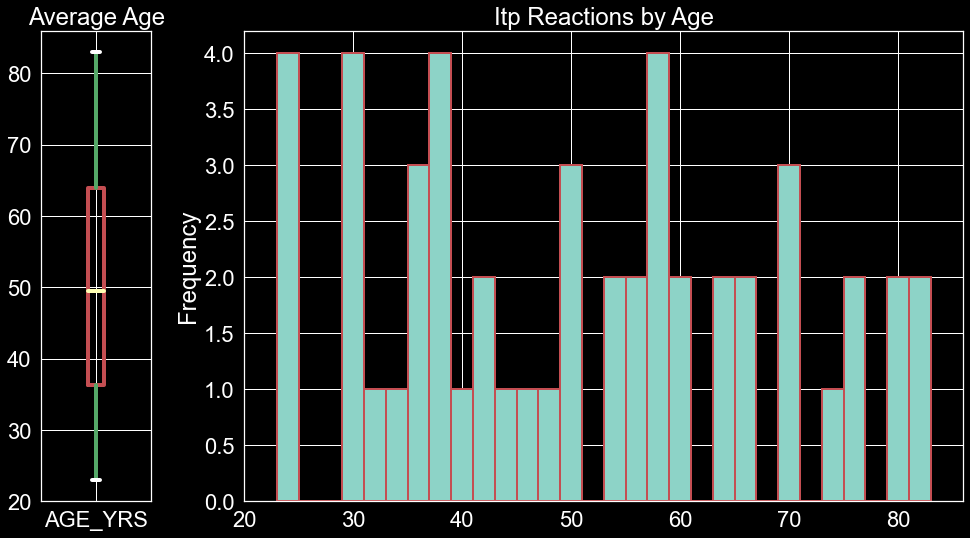

In [23]:
ana_disease(D_V_CDC, 'ITP') # Idiopathic thrombocytopenic purpura, Also called: ITP, immune thrombocytopenic purpura 特发性血小板减少性紫癜

In [24]:
D_V_CDC.isin(["NOT"]) # Whether each element in the DataFrame is contained in values. DataFrame of booleans showing whether each element in the DataFrame is contained in values.

VAERS_ID  RECVDATE  STATE  AGE_YRS  CAGE_YR  CAGE_MO    SEX  \
0           False     False  False    False    False    False  False   
1           False     False  False    False    False    False  False   
2           False     False  False    False    False    False  False   
3           False     False  False    False    False    False  False   
4           False     False  False    False    False    False  False   
...           ...       ...    ...      ...      ...      ...    ...   
1087211     False     False  False    False    False    False  False   
1087212     False     False  False    False    False    False  False   
1087213     False     False  False    False    False    False  False   
1087214     False     False  False    False    False    False  False   
1087215     False     False  False    False    False    False  False   

         RPT_DATE  SYMPTOM_TEXT   DIED  DATEDIED  L_THREAT  ER_VISIT  \
0           False         False  False     False     False     False   
1           False         False  False     False     False     False   
2           False         False  False     False     False     False   
3           False         False  False     False     False     False   
4           False         False  False     False     False     False   
...           ...           ...    ...       ...       ...       ...   
1087211     False         False  False     False     False     False   
1087212     False         False  False     False     False     False   
1087213     False         False  False     False     False     False   
1087214     False         False  False     False     False     False   
1087215     False         False  False     False     False     False   

         HOSPITAL  HOSPDAYS  X_STAY  DISABLE  RECOVD  VAX_DATE  ONSET_DATE  \
0           False     False   False    False   False     False       False   
1           False     False   False    False   False     False       False   
2           False     False   False    False   False     False       False   
3           False     False   False    False   False     False       False   
4           False     False   False    False   False     False       False   
...           ...       ...     ...      ...     ...       ...         ...   
1087211     False     False   False    False   False     False       False   
1087212     False     False   False    False   False     False       False   
1087213     False     False   False    False   False     False       False   
1087214     False     False   False    False   False     False       False   
1087215     False     False   False    False   False     False       False   

         NUMDAYS  LAB_DATA  V_ADMINBY  V_FUNDBY  OTHER_MEDS  CUR_ILL  HISTORY  \
0          False     False      False     False       False    False    False   
1          False     False      False     False       False    False    False   
2          False     False      False     False       False    False    False   
3          False     False      False     False       False    False    False   
4          False     False      False     False       False    False    False   
...          ...       ...        ...       ...         ...      ...      ...   
1087211    False     False      False     False       False    False    False   
1087212    False     False      False     False       False    False    False   
1087213    False     False      False     False       False    False    False   
1087214    False     False      False     False       False    False    False   
1087215    False     False      False     False       False    False    False   

         PRIOR_VAX  SPLTTYPE  FORM_VERS  TODAYS_DATE  BIRTH_DEFECT  OFC_VISIT  \
0            False     False      False        False         False      False   
1            False     False      False        False         False      False   
2            False     False      False        False         False      False   
3            False     False      False      

In [25]:
D_V_CDC[D_V_CDC.isin(["breath"]).all(axis=1)]

Empty DataFrame
Columns: [VAERS_ID, RECVDATE, STATE, AGE_YRS, CAGE_YR, CAGE_MO, SEX, RPT_DATE, SYMPTOM_TEXT, DIED, DATEDIED, L_THREAT, ER_VISIT, HOSPITAL, HOSPDAYS, X_STAY, DISABLE, RECOVD, VAX_DATE, ONSET_DATE, NUMDAYS, LAB_DATA, V_ADMINBY, V_FUNDBY, OTHER_MEDS, CUR_ILL, HISTORY, PRIOR_VAX, SPLTTYPE, FORM_VERS, TODAYS_DATE, BIRTH_DEFECT, OFC_VISIT, ER_ED_VISIT, ALLERGIES, VAX_TYPE, VAX_MANU, VAX_LOT, VAX_DOSE_SERIES, VAX_ROUTE, VAX_SITE, VAX_NAME, SYMPTOM1, SYMPTOMVERSION1, SYMPTOM2, SYMPTOMVERSION2, SYMPTOM3, SYMPTOMVERSION3, SYMPTOM4, SYMPTOMVERSION4, SYMPTOM5, SYMPTOMVERSION5]
Index: []

In [26]:
dup = vaers[vaers['VAERS_ID'].duplicated(keep='first')]
dup

VAERS_ID                        SYMPTOM1  SYMPTOMVERSION1  \
6         916605                         Pyrexia             24.0   
13        916611                        Dyspnoea             23.1   
14        916611            Heart rate decreased             23.1   
15        916611                          Nausea             23.1   
16        916611        SARS-CoV-2 antibody test             23.1   
...          ...                             ...              ...   
360526   1548896                Respiratory rate             24.0   
360531   1549751           Loss of consciousness             24.0   
360534   1549926  Pulmonary alveolar haemorrhage             24.0   
360536   1550656                     Feeling hot             24.0   
360537   1550656                 Oligomenorrhoea             24.0   

                                SYMPTOM2  SYMPTOMVERSION2  \
6       White blood cell count decreased             24.0   
13                               Fatigue             23.1   
14                  Heart rate increased             23.1   
15                                  Pain             23.1   
16              SARS-CoV-2 test negative             23.1   
...                                  ...              ...   
360526                   SARS-CoV-2 test             24.0   
360531                            Nausea             24.0   
360534                     Renal failure             24.0   
360536                          Headache             24.0   
360537                           Pyrexia             24.0   

                        SYMPTOM3  SYMPTOMVERSION3                SYMPTOM4  \
6                            NaN              NaN                     NaN   
13              Feeling abnormal             23.1         Head discomfort   
14                  Hypertension             23.1     Injection site pain   
15             Pain in extremity             23.1       Paraesthesia oral   
16                           NaN              NaN                     NaN   
...                          ...              ...                     ...   
360526       Vaccination failure             24.0  White blood cell count   
360531           Skin laceration             24.0                  Thirst   
360534               Slow speech             24.0                     NaN   
360536  Heavy menstrual bleeding             24.0           Hyperhidrosis   
360537                  Swelling             24.0                     NaN   

        SYMPTOMVERSION4                    SYMPTOM5  SYMPTOMVERSION5  
6                   NaN                         NaN              NaN  
13                 23.1                    Headache             23.1  
14                 23.1  Musculoskeletal chest pain             23.1  
15                 23.1                     Pyrexia             23.1  
16                  NaN                         NaN              NaN  
...                 ...                         ...              ...  
360526             24.0               pH body fluid             24.0  
360531             24.0                         NaN              NaN  
360534              NaN                         NaN              NaN  
360536             24.0                     Myalgia             24.0  
360537              NaN                         NaN              NaN  

[287678 rows x 11 columns]

In [27]:
dup['VAERS_ID'].value_counts()

607782     37
403859     28
1458685    25
795238     25
689687     24
           ..
1088114     1
351578      1
584316      1
1110655     1
1015178     1
Name: VAERS_ID, Length: 199527, dtype: int64

In [28]:
dup[dup['VAERS_ID']== 607782]

VAERS_ID                          SYMPTOM1  SYMPTOMVERSION1  \
94751    607782                Affective disorder             20.1   
94752    607782                        Angioedema             20.1   
94753    607782                        Arthralgia             20.1   
94754    607782              Blood iron decreased             20.1   
94755    607782      C-reactive protein increased             20.1   
94756    607782                Cognitive disorder             20.1   
94757    607782                    Conjunctivitis             20.1   
94758    607782  Depressed level of consciousness             20.1   
94759    607782                          Diplopia             20.1   
94760    607782                        Dysarthria             20.1   
94761    607782                          Ear pain             20.1   
94762    607782      Expired product administered             20.1   
94763    607782                           Fatigue             20.1   
94764    607782                  Gait disturbance             20.1   
94765    607782                          Headache             20.1   
94766    607782                    Hypercalcaemia             20.1   
94767    607782                     Hypoaesthesia             20.1   
94768    607782            Injection site abscess             20.1   
94769    607782               Injection site pain             20.1   
94770    607782                          Insomnia             20.1   
94771    607782                         Leukaemia             20.1   
94772    607782                       Lymphopenia             20.1   
94773    607782                Menstrual disorder             20.1   
94774    607782                  Muscle twitching             20.1   
94775    607782                         Mydriasis             20.1   
94776    607782                       Nervousness             20.1   
94777    607782                      Otitis media             20.1   
94778    607782                    Panic reaction             20.1   
94779    607782                         Petechiae             20.1   
94780    607782                Psychotic disorder             20.1   
94781    607782                    Rash vesicular             20.1   
94782    607782                    Serum sickness             20.1   
94783    607782                    Sleep disorder             20.1   
94784    607782                           Syncope             20.1   
94785    607782                  Throat tightness             20.1   
94786    607782           Urinary tract infection             20.1   
94787    607782                    Vision blurred             20.1   

                               SYMPTOM2  SYMPTOMVERSION2  \
94751                          Alopecia             20.1   
94752                  Anogenital warts             20.1   
94753                       Arthropathy             20.1   
94754                         Bone pain             20.1   
94755                  Chest discomfort             20.1   
94756                        Cold sweat             20.1   
94757                             Cough             20.1   
94758                        Depression             20.1   
94759          Disturbance in attention             20.1   
94760                         Dysgeusia             20.1   
94761                            Eczema             20.1   
94762         Exposure during pregnancy             20.1   
94763                      Feeling cold             20.1   
94764  Generalised tonic-clonic seizure             20.1   
94765          Henoch-Schonlein purpura             20.1   
94766                     Hyperhidrosis             20.1   
94767                     Hypoglycaemia             20.1   
94768           Injection site bruising             20.1   
94769           Injection site pruritus             20.1   
94770                      Irritability             20.1   
94771                   Limb discomfort             20.1   
94772                     

In [29]:
vaerv['VAERS_ID'].value_counts()

838146     42
869268     36
863834     19
866579     19
832116     18
           ..
1482339     1
1484388     1
437861      1
1488486     1
1050623     1
Name: VAERS_ID, Length: 691345, dtype: int64

In [30]:
vaerv[vaerv['VAERS_ID']==838146]

VAERS_ID VAX_TYPE              VAX_MANU VAX_LOT VAX_DOSE_SERIES  \
132813    838146     FLUX  UNKNOWN MANUFACTURER     NaN             UNK   
132814    838146      PNC          PFIZER\WYETH     NaN             UNK   
132815    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132816    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132817    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132818    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132819    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132820    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132821    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132822    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132823    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132824    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132825    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132826    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132827    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132828    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132829    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132830    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132831    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132832    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132833    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132834    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132835    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132836    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132837    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132838    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132839    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132840    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132841    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132842    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132843    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132844    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132845    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132846    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132847    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132848    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132849    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132850    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132851    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132852    838146      UNK  UNKNOWN MANUFACTURER     NaN             UNK   
132853    838146      UNK  UNKNOWN MANUFACTURER    776T             UNK   
132854    838146      UNK  UNKNOWN MANUFACTURER    3F6B             UNK   

       VAX_ROUTE VAX_SITE                               VAX_NAME  
132813       NaN      NaN   INFLUENZA (SEASONAL) (NO BRAND NAME)  
132814       NaN      NaN                       PNEUMO (PREVNAR)  
132815       NaN      NaN  VACCINE NOT SPECIFIED (NO BRAND NAME)  
132816       NaN      NaN  VACCINE NOT SPECIFIED (NO BRAND NAME)  
132817        OT      NaN  VACCINE NOT SPECIFIED (NO BRAND NAME)  
132818       NaN      NaN  VACCINE NOT SPECIFIED (NO BRAND NAME)  
132819       NaN      NaN  VACCINE NOT SPECIFIED (NO BRAND NAME)  
132820        OT      NaN  VACCINE NOT SPECIFIED (NO BRAND NAME)  
132821        OT      NaN  VACCINE NOT SPECIFIED (NO BRAND NAME)  
132822       NaN      NaN  VACCINE NOT SPECIFIED (NO BRAND NAME)  
132823       NaN      NaN  VACCINE NOT SPECIF

In [31]:
vaers.drop_duplicates(subset="VAERS_ID", keep='first', inplace=True)
vaerv.drop_duplicates(subset="VAERS_ID", keep='first', inplace=True)

In [32]:
print(len(vaers), len(vaerv), len(vaerd))

691342 691345 691345


In [33]:
vaerv[vaerv['VAERS_ID']==962303]

VAERS_ID VAX_TYPE         VAX_MANU VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
41256    962303  COVID19  PFIZER\BIONTECH     NaN             UNK       NaN   

      VAX_SITE                             VAX_NAME  
41256       LA  COVID19 (COVID19 (PFIZER-BIONTECH))

In [34]:
vaerd[vaerd['VAERS_ID']==962303]

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
43075    962303  01/21/2021    MS     87.0      NaN      NaN   M      NaN   

                                            SYMPTOM_TEXT DIED DATEDIED  \
43075  he smelled some kind of chemical; he began to ...  NaN      NaN   

      L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD    VAX_DATE  \
43075      NaN      NaN      NaN       NaN    NaN     NaN      U  01/15/2021   

       ONSET_DATE  NUMDAYS LAB_DATA V_ADMINBY V_FUNDBY OTHER_MEDS CUR_ILL  \
43075  01/17/2021      2.0      NaN       UNK      NaN        NaN     NaN   

                                                 HISTORY PRIOR_VAX  \
43075  Medical History/Concurrent Conditions: Auditor...       NaN   

                     SPLTTYPE  FORM_VERS TODAYS_DATE BIRTH_DEFECT OFC_VISIT  \
43075  USPFIZER INC2021042638          2  01/21/2021          NaN       NaN   

      ER_ED_VISIT ALLERGIES  
43075         NaN       NaN

In [35]:
vaerd['VAERS_ID'].duplicated().value_counts()

False    691345
Name: VAERS_ID, dtype: int64

In [36]:
V_CDC = vaerd.merge(vaerv, on= "VAERS_ID", how='inner')
V_CDC = V_CDC.merge(vaers, on= "VAERS_ID", how='inner')

In [37]:
len(V_CDC)

691342

In [38]:
xx=V_CDC[V_CDC['STATE']=='TX']
xx.tail(15)
xx[xx['DIED']== 'Y']

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
14038     930876  01/08/2021    TX     88.0     88.0      NaN   M      NaN   
19674     935350  01/11/2021    TX     81.0     81.0      NaN   M      NaN   
24674     940602  01/13/2021    TX     83.0     83.0      NaN   M      NaN   
43956     963235  01/21/2021    TX     94.0     94.0      NaN   F      NaN   
43988     963269  01/21/2021    TX     87.0     87.0      NaN   F      NaN   
...          ...         ...   ...      ...      ...      ...  ..      ...   
447600   1532021  08/06/2021    TX     62.0     62.0      NaN   F      NaN   
447735   1532167  08/06/2021    TX     33.0     33.0      NaN   M      NaN   
450198   1536481  08/09/2021    TX     86.0     86.0      NaN   M      NaN   
452904   1541117  08/10/2021    TX     83.0     83.0      NaN   F      NaN   
452906   1541119  08/10/2021    TX     94.0     94.0      NaN   F      NaN   

                                             SYMPTOM_TEXT DIED    DATEDIED  \
14038                                               Death    Y  01/08/2021   
19674   Patient was found unresponsive at home with Sp...    Y  01/06/2021   
24674   Patient received vaccine on 1/8/2021.  On 1/9/...    Y         NaN   
43956   Patient diagnosed with COVID on January 9, 202...    Y  01/18/2021   
43988                   Patient passed away on 01/18/2021    Y  01/18/2021   
...                                                   ...  ...         ...   
447600  Janssen COVID-19 Vaccine EUA Patient received ...    Y  07/26/2021   
447735  The patient died of a hemorrhaging cerebral he...    Y  05/13/2021   
450198  Patient's caretaker, called today on 08/09/21 ...    Y  06/17/2021   
452904  Pfizer BioNTech COVID-19 Vaccine EUA Patient r...    Y  08/03/2021   
452906  Janssen COVID-19 Vaccine EUA Patient received ...    Y  08/06/2021   

       L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD    VAX_DATE  \
14038       NaN      NaN      NaN       NaN    NaN     NaN      N  01/07/2021   
19674       NaN      NaN        Y       4.0    NaN     NaN      N  12/31/2020   
24674       NaN      NaN      NaN       NaN    NaN     NaN    NaN  01/08/2021   
43956       NaN      NaN        Y       5.0    NaN     NaN      N  01/04/2021   
43988       NaN      NaN      NaN       NaN    NaN     NaN      N  01/04/2021   
...         ...      ...      ...       ...    ...     ...    ...         ...   
447600      NaN      NaN        Y      18.0    NaN     NaN      N  04/30/2021   
447735      NaN      NaN      NaN       NaN    NaN     NaN      N  04/20/2021   
450198      NaN      NaN      NaN       NaN    NaN     NaN      N  04/06/2021   
452904      NaN      NaN        Y       5.0    NaN     NaN      N  03/23/2021   
452906      NaN      NaN        Y      18.0    NaN     NaN      N  03/10/2021   

        ONSET_DATE  NUMDAYS  \
14038   01/08/2021      1.0   
19674   01/02/2021      2.0   
24674   01/10/2021      2.0   
43956   01/09/2021      5.0   
43988   01/18/2021     14.0   
...            ...      ...   
447600  05/26/2021     26.0   
447735  05/12/2021     22.0   
450198  06/17/2021     72.0   
452904  07/30/2021    129.0   
452906  07/10/2021    122.0   

                                                 LAB_DATA V_ADMINBY V_FUNDBY  \
14038   Had IV dye imaging procedure after he received...       PHM      NaN   
19674                                                 NaN       PVT      NaN   
24674                                                 NaN       PVT      NaN   
43956                                          COVID test       WRK      NaN   
43988                                                 NaN       WRK      NaN   
...                                                   ...       ...      ...   
447600                                                NaN       PVT      NaN   
447735  Autopsy conducted. The coroner listed the caus...       PHM      NaN   
450198                                                NaN       PHM 

In [39]:
V_CDC[V_CDC.eq("ITP").any(1)] # Idiopathic thrombocytopenic purpura, Also called: ITP, immune thrombocytopenic purpura 特发性血小板减少性紫癜

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
18617     934079  01/11/2021    CA     59.0     59.0      NaN   F      NaN   
19814     935500  01/11/2021    AZ     50.0     50.0      NaN   F      NaN   
33780     951354  01/17/2021    NY     36.0     36.0      NaN   F      NaN   
35528     953404  01/18/2021    FL     70.0     70.0      NaN   M      NaN   
36536     954534  01/19/2021    CA     29.0     29.0      NaN   F      NaN   
81150    1012079  02/05/2021    NJ     57.0      NaN      NaN   F      NaN   
83486    1009717  02/07/2021    NJ     33.0     33.0      NaN   F      NaN   
83698    1009944  02/07/2021    FL     66.0     66.0      NaN   F      NaN   
96101    1027099  02/12/2021    WI     38.0     38.0      NaN   F      NaN   
103298   1036489  02/17/2021    NY     41.0     41.0      NaN   F      NaN   
103363   1036558  02/17/2021   NaN     69.0     69.0      NaN   M      NaN   
111470   1046835  02/22/2021    VA     65.0     65.0      NaN   M      NaN   
116114   1053348  02/24/2021    TX     75.0     75.0      NaN   F      NaN   
118612   1056805  02/26/2021    MT     37.0     37.0      NaN   F      NaN   
119114   1057756  02/26/2021    MI     80.0     80.0      NaN   M      NaN   
145756   1091185  03/11/2021    CT     58.0     58.0      NaN   F      NaN   
157708   1104764  03/16/2021    MD     54.0     54.0      NaN   F      NaN   
160390   1108146  03/17/2021    KY     49.0     49.0      NaN   M      NaN   
168270   1118029  03/20/2021    ND     29.0     29.0      NaN   F      NaN   
174835   1126301  03/23/2021    CT     73.0     73.0      NaN   F      NaN   
177984   1130479  03/24/2021    IN     44.0     44.0      NaN   F      NaN   
193641   1149189  03/30/2021    CO     49.0     49.0      NaN   M      NaN   
195143   1151140  03/31/2021    IL     83.0     83.0      NaN   M      NaN   
215317   1175576  04/07/2021    AR     30.0     30.0      NaN   M      NaN   
229044   1191480  04/10/2021    FL     55.0     55.0      NaN   F      NaN   
230523   1193050  04/11/2021    DC     59.0     59.0      NaN   F      NaN   
238326   1201925  04/13/2021    TX     38.0     38.0      NaN   F      NaN   
241843   1205703  04/13/2021    NC     64.0     64.0      NaN   F      NaN   
242410   1206280  04/14/2021    MI     45.0     45.0      NaN   M      NaN   
244654   1208786  04/14/2021    CA     79.0     79.0      NaN   F      NaN   
247623   1212406  04/15/2021    TX     24.0     24.0      NaN   M      NaN   
252145   1218060  04/16/2021    MI     70.0     70.0      NaN   M      NaN   
280484   1251928  04/24/2021    PA     32.0     32.0      NaN   F      NaN   
297476   1271942  04/29/2021    NY     57.0     57.0      NaN   F      NaN   
336672   1322801  05/17/2021    GA     75.0     75.0      NaN   M      NaN   
348238   1341089  05/22/2021    TX     47.0     47.0      NaN   F      NaN   
375078   1382280  06/08/2021    VA     23.0     23.0      NaN   F      NaN   
394217   1415266  06/21/2021   NaN     39.0     39.0      NaN   M      NaN   
412810   1454289  07/07/2021    VA     30.0     30.0      NaN   F      NaN   
413207   1454740  07/07/2021    NJ     64.0     64.0      NaN   M      NaN   

                                             SYMPTOM_TEXT DIED DATEDIED  \
18617   25 min after injection and said she had itchin...  NaN      NaN   
19814   Right upper chest pain, constant, pain increas...  NaN      NaN   
33780   Patient presented with diffuse petechiae, easy...  NaN      NaN   
35528   Severe rash. Platelets drop to almost needing ...  NaN      NaN   
36536   Pfizer-BioNTech COVID-19 Vaccine EUA Diarrhea ...  NaN      NaN   
81150   My platelets dropped from 382k to under 10k 2 ...  NaN      NaN   
83486   Hives developed on bilateral elbows and on the...  NaN      NaN   
83698   Mild fatigue, muscle soreness, body aches, occ...  NaN      NaN   
96101   Sore arm, body aches, headache, fever, chills,...  NaN      NaN   
103298  Thrombocytopenia. Platelets went from 175K day...  

In [40]:
print(xx['VAX_MANU'].unique())
xxx=xx[xx['VAX_MANU']=='PFIZER\\BIONTECH']
xxx

['MODERNA' 'SEQIRUS, INC.' 'PFIZER\\BIONTECH' 'UNKNOWN MANUFACTURER'
 'GLAXOSMITHKLINE BIOLOGICALS' 'SANOFI PASTEUR' 'PFIZER\\WYETH'
 'PROTEIN SCIENCES CORPORATION' 'NOVARTIS VACCINES AND DIAGNOSTICS'
 'MERCK & CO. INC.' 'BERNA BIOTECH, LTD.' 'JANSSEN' 'PAXVAX'
 'MASS. PUB HLTH BIOL LAB']


VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
121       916723  01/01/2021    TX     39.0     39.0      NaN   M      NaN   
176       916785  01/01/2021    TX     35.0     35.0      NaN   F      NaN   
276       916890  01/01/2021    TX     39.0     39.0      NaN   F      NaN   
350       916966  01/01/2021    TX     51.0     51.0      NaN   F      NaN   
458       917078  01/01/2021    TX     52.0     52.0      NaN   F      NaN   
...          ...         ...   ...      ...      ...      ...  ..      ...   
458946   1549762  08/12/2021    TX     30.0     30.0      NaN   F      NaN   
458948   1549765  08/12/2021    TX     34.0     34.0      NaN   F      NaN   
458949   1549766  08/12/2021    TX     63.0     63.0      NaN   M      NaN   
458959   1549776  08/12/2021    TX     40.0     39.0      NaN   F      NaN   
459364   1550431  08/12/2021    TX     36.0     36.0      NaN   M      NaN   

                                             SYMPTOM_TEXT DIED DATEDIED  \
121     Headache and myalgias started day 2 after vacc...  NaN      NaN   
176     After receiving the vaccine I began to feel li...  NaN      NaN   
276               HIVES, SOB, THROAT CLOSING UP, WHEEZING  NaN      NaN   
350     *12/21-22-increased soreness at site of inject...  NaN      NaN   
458     10MINS AFTER THE VACCINATION  LEFT SIDED FACIA...  NaN      NaN   
...                                                   ...  ...      ...   
458946  Right after the shot I experienced Facial numb...  NaN      NaN   
458948  Tingling of legs, right leg more than left. Ho...  NaN      NaN   
458949                                       None stated.  NaN      NaN   
458959  vaccinated with pfizer in Dec 2020 and January...  NaN      NaN   
459364  Severe joint pain in right ankle. Immobilized ...  NaN      NaN   

       L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD    VAX_DATE  \
121         NaN      NaN      NaN       NaN    NaN     NaN      N  12/18/2020   
176         NaN      NaN      NaN       NaN    NaN     NaN      N  12/28/2020   
276           Y      NaN        Y       4.0    NaN     NaN      Y  12/01/2020   
350         NaN      NaN      NaN       NaN    NaN     NaN      U  12/21/2020   
458         NaN      NaN      NaN       NaN    NaN     NaN      Y  12/31/2020   
...         ...      ...      ...       ...    ...     ...    ...         ...   
458946      NaN      NaN      NaN       NaN    NaN     NaN    NaN  08/11/2021   
458948      NaN      NaN      NaN       NaN    NaN     NaN      N  08/11/2021   
458949      NaN      NaN      NaN       NaN    NaN     NaN      N  05/02/2021   
458959      NaN      NaN      NaN       NaN    NaN     NaN      N  01/01/2021   
459364      NaN      NaN      NaN       NaN    NaN       Y      N  05/17/2021   

        ONSET_DATE  NUMDAYS  \
121     12/27/2020      9.0   
176     12/28/2020      0.0   
276     12/22/2020     21.0   
350     12/28/2020      7.0   
458     12/31/2020      0.0   
...            ...      ...   
458946  08/11/2021      0.0   
458948  08/12/2021      1.0   
458949  05/03/2021      1.0   
458959         NaN      NaN   
459364  05/18/2021      1.0   

                                                 LAB_DATA V_ADMINBY V_FUNDBY  \
121                                                   NaN       UNK      NaN   
176     BMP, CBC, Cardiac Profile, CXR, COVID, Influen...       PVT      NaN   
276                         COVID TEST, LABS, Chest-X-Ray       WRK      NaN   
350     *12/30-Covid Lab with 24 hour turn around-nega...       OTH      NaN   
458                                                   NaN       SEN      NaN   
...                                                   ...       ...      ...   
458946                                                NaN       PHM      NaN   
458948                                                NaN       PVT      NaN   
458949                                                NaN       PHM      NaN   
458959           Rapid A

In [41]:
V_CDC['VAX_NAME'].value_counts()

COVID19 (COVID19 (PFIZER-BIONTECH))                     318394
COVID19 (COVID19 (MODERNA))                             215208
COVID19 (COVID19 (JANSSEN))                              49976
HPV (GARDASIL)                                            8725
INFLUENZA (SEASONAL) (NO BRAND NAME)                      5628
                                                         ...  
DIPHTHERIA TOXOID + PERTUSSIS + IPV (QUATRO VIRELON)         1
INFLUENZA (SEASONAL) (FLUOGEN)                               1
RUBELLA (MERUVAX I)                                          1
LYME (NO BRAND NAME)                                         1
INFLUENZA (SEASONAL) (FLUZONE INTRADERMAL)                   1
Name: VAX_NAME, Length: 216, dtype: int64

In [42]:
V_CDC = V_CDC[V_CDC['VAX_TYPE'] == 'COVID19']

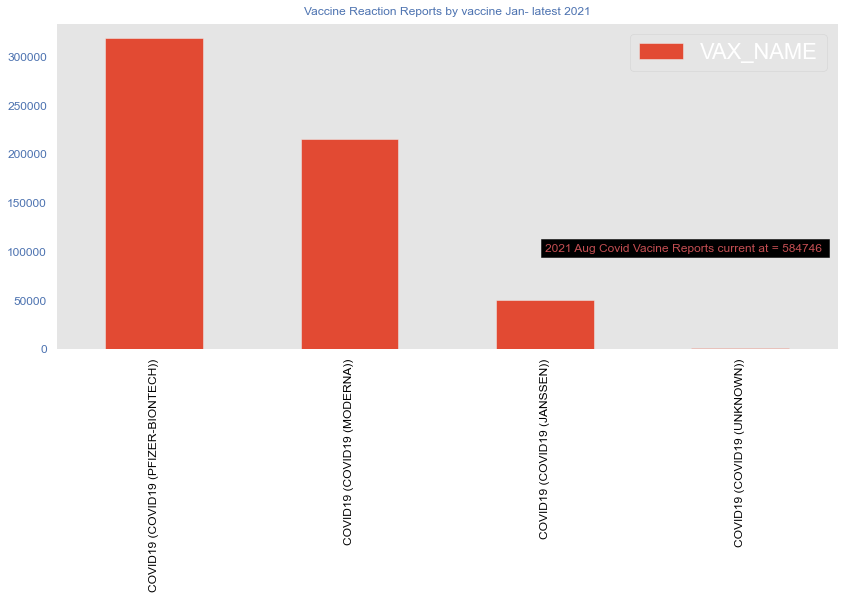

In [43]:
plt.style.use('ggplot')
plt.title("Vaccine Reaction Reports by vaccine Jan- latest 2021", fontsize=12, pad=8, color='b')
V_CDC['VAX_NAME'].value_counts().plot(kind='bar', figsize=(14,6))
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='b')
t = len(V_CDC)
plt.text(2, 100000, '2021 Aug Covid Vacine Reports current at = %i ' %(t), color='r', fontsize=12, backgroundcolor='black')
plt.legend()
plt.grid(color='r')
plt.show()

In [44]:
m = V_CDC[V_CDC['VAX_NAME']=="COVID19 (COVID19 (MODERNA))"]
p = V_CDC[V_CDC['VAX_NAME']=="COVID19 (COVID19 (PFIZER-BIONTECH))"]
j = V_CDC[V_CDC['VAX_NAME']=="COVID19 (COVID19 (JANSSEN))"]
VM_CDC = pd.concat([m,p,j])
VM_CDC

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
0         916600  01/01/2021    TX     33.0     33.0      NaN   F      NaN   
1         916601  01/01/2021    CA     73.0     73.0      NaN   F      NaN   
3         916603  01/01/2021    WA     58.0     58.0      NaN   F      NaN   
4         916604  01/01/2021    TX     47.0     47.0      NaN   F      NaN   
6         916606  01/01/2021    NV     44.0     44.0      NaN   F      NaN   
...          ...         ...   ...      ...      ...      ...  ..      ...   
691318   1547170  08/12/2021    FR      NaN      NaN      NaN   M      NaN   
691319   1547172  08/12/2021    FR      NaN      NaN      NaN   U      NaN   
691321   1547292  08/12/2021    FR      NaN      NaN      NaN   F      NaN   
691330   1548884  08/12/2021    FR      NaN      NaN      NaN   F      NaN   
691341   1553455  08/13/2021    FR     74.0     74.0      NaN   F      NaN   

                                             SYMPTOM_TEXT DIED    DATEDIED  \
0       Right side of epiglottis swelled up and hinder...  NaN         NaN   
1       Approximately 30 min post vaccination administ...  NaN         NaN   
3       extreme fatigue, dizziness,. could not lift my...  NaN         NaN   
4       Injection site swelling, redness, warm to the ...  NaN         NaN   
6       patient called back the next day and stated he...  NaN         NaN   
...                                                   ...  ...         ...   
691318  DEAD ON ARRIVAL; HEART ATTACK; HANDS WERE SWOL...    Y         NaN   
691319  DEATH; This spontaneous report received from a...    Y         NaN   
691321  DEEP VEIN THROMBOSIS; PULMONARY THROMBOEMBOLIS...    Y  07/23/2021   
691330  STROKE; ABSCESS ON THE NECK; SWOLLEN HEAD; WEA...    Y         NaN   
691341                              Blood cloths in lungs  NaN         NaN   

       L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD    VAX_DATE  \
0           NaN      NaN      NaN       NaN    NaN     NaN      Y  12/28/2020   
1           NaN      NaN      NaN       NaN    NaN     NaN      Y  12/31/2020   
3           NaN      NaN      NaN       NaN    NaN     NaN      Y  12/23/2020   
4           NaN      NaN      NaN       NaN    NaN     NaN      N  12/22/2020   
6           NaN      NaN      NaN       NaN    NaN     NaN      Y  12/29/2020   
...         ...      ...      ...       ...    ...     ...    ...         ...   
691318      NaN      NaN      NaN       NaN    NaN     NaN      N         NaN   
691319      NaN      NaN      NaN       NaN    NaN     NaN      N         NaN   
691321      NaN      NaN      NaN       NaN    NaN     NaN      N         NaN   
691330      NaN      NaN      NaN       NaN    NaN     NaN      N         NaN   
691341      NaN      NaN      NaN       NaN    NaN     NaN      N  08/05/2021   

        ONSET_DATE  NUMDAYS  \
0       12/30/2020      2.0   
1       12/31/2020      0.0   
3       12/23/2020      0.0   
4       12/29/2020      7.0   
6       12/29/2020      0.0   
...            ...      ...   
691318         NaN      NaN   
691319         NaN      NaN   
691321  07/21/2021      NaN   
691330  07/02/2021      NaN   
691341  08/05/2021      0.0   

                                                 LAB_DATA V_ADMINBY V_FUNDBY  \
0                                                    None       PVT      NaN   
1                                                     NaN       SEN      NaN   
3                                                    none       WRK      NaN   
4                                                     NaN       PUB      NaN   
6       Did not seek medical care. Treated self at hom...       PVT      NaN   
...                                                   ...       ...      ...   
691318  Test Name: Uric acid; Result Unstructured Data...       OTH      NaN   
691319                                                NaN       OTH      NaN   
691321                                                NaN       OTH 

In [45]:
VM_CDC['AGE_YRS'].value_counts

<bound method IndexOpsMixin.value_counts of 0         33.0
1         73.0
3         58.0
4         47.0
6         44.0
          ... 
691318     NaN
691319     NaN
691321     NaN
691330     NaN
691341    74.0
Name: AGE_YRS, Length: 583578, dtype: float64>

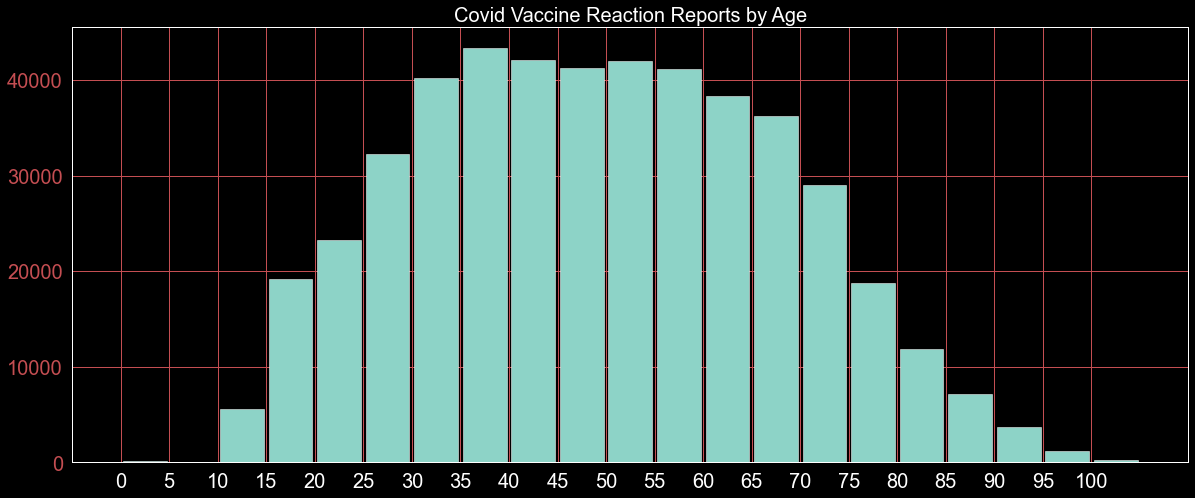

In [46]:
plt.style.use('dark_background')
VM_CDC['AGE_YRS'].hist(bins=range(0,110,5), figsize=FIGSIZE2, rwidth=0.9)
plt.title("Covid Vaccine Reaction Reports by Age", fontsize=20)
plt.xticks(np.arange(0,105,5), fontsize=20)
plt.yticks(fontsize=20, color='r')
plt.grid(color='r', visible=True)
plt.show()

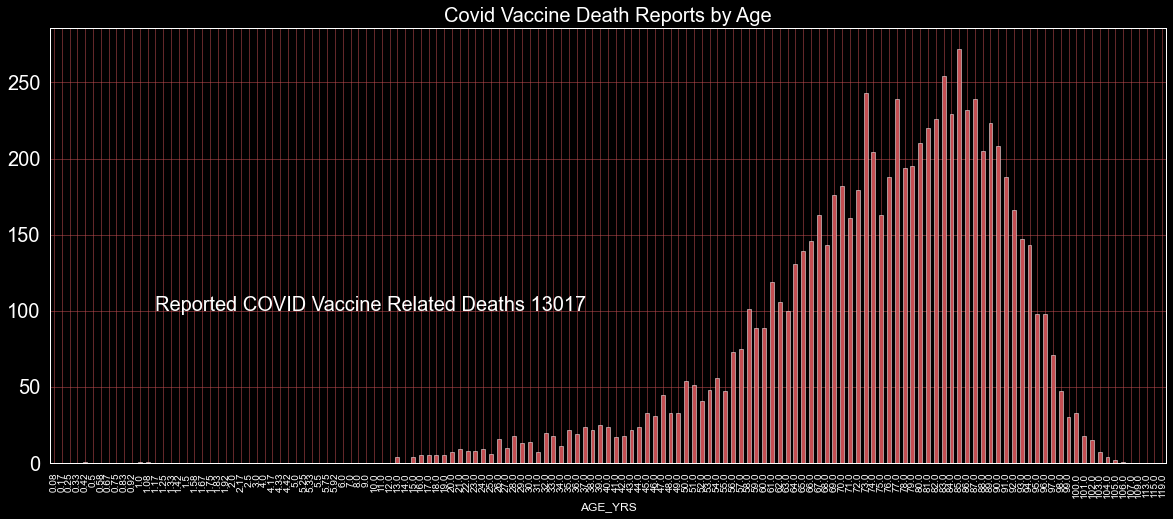

In [47]:
VM_CDC.groupby('AGE_YRS')['DIED'].count().plot.bar(figsize=FIGSIZE2, color='r')
plt.title("Covid Vaccine Death Reports by Age", fontsize=20)
plt.xticks(fontsize=10)
m = VM_CDC['DIED'].count()
plt.text(13, 100, "Reported COVID Vaccine Related Deaths %i" %(m), fontsize=20)
plt.yticks(fontsize=20, color='w')
plt.grid(color='r', visible=True, alpha=0.5)
plt.show()

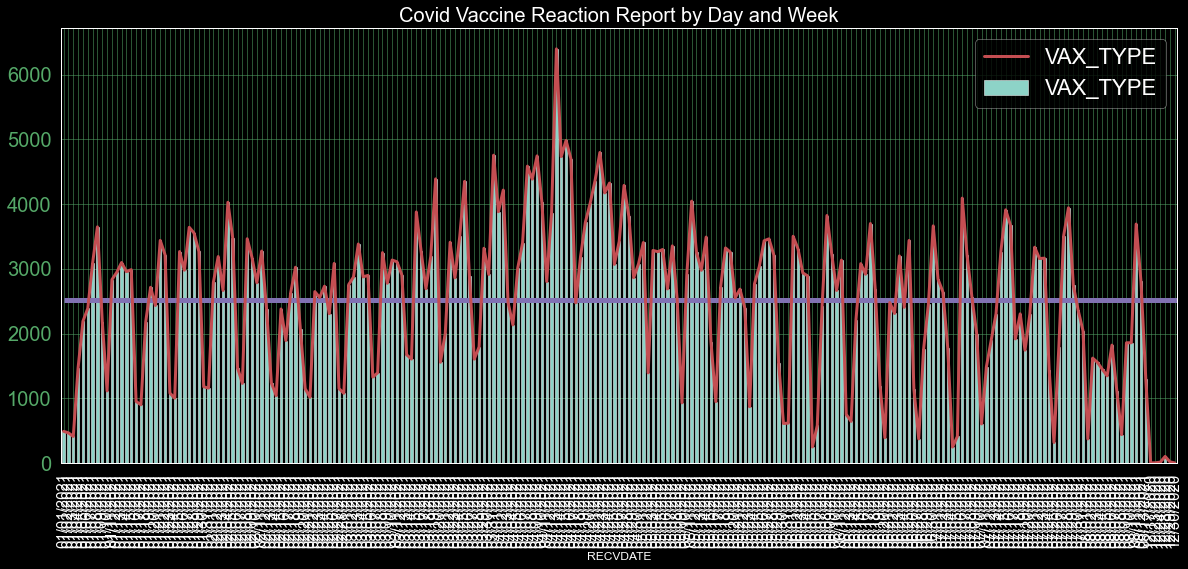

2526.311688311688


In [48]:
ax1= VM_CDC.groupby("RECVDATE")["VAX_TYPE"].count().rolling(1,min_periods=1).sum()
ax2 = VM_CDC.groupby("RECVDATE")["VAX_TYPE"].count()
ax3 = VM_CDC.groupby("RECVDATE")["VAX_TYPE"].count().mean()
ax1.plot(kind='line', figsize=FIGSIZE2, color='r', linewidth=3)
ax2.plot(kind='bar')

plt.hlines(ax3,0,len(ax2),linewidth=5,color='m')
plt.title("Covid Vaccine Reaction Report by Day and Week", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20, color='g')
plt.grid(color='g', alpha=.5, visible=True)
plt.legend()
plt.show()
print(ax3)

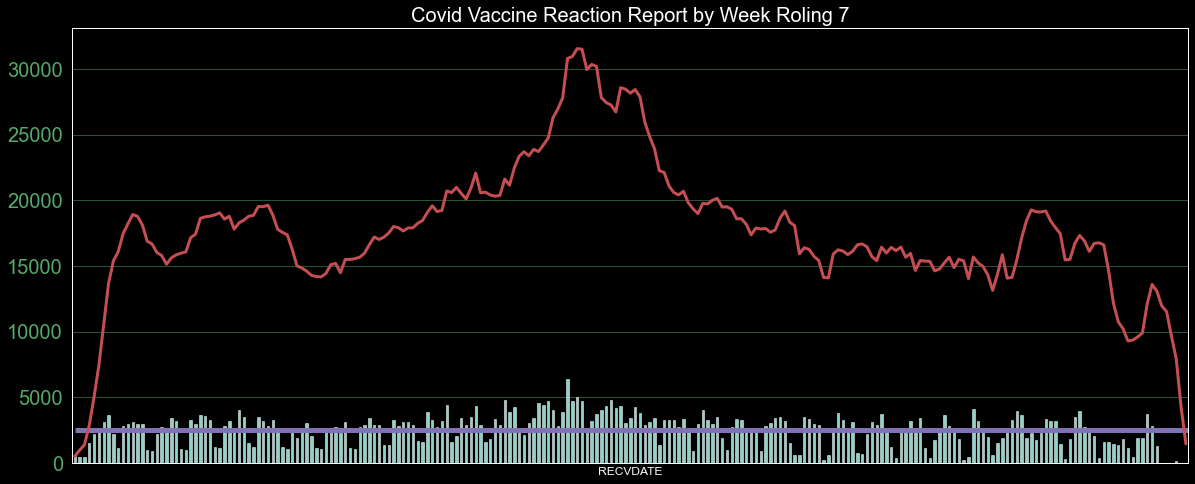

2526.311688311688


In [49]:
ax1= VM_CDC.groupby("RECVDATE")["VAX_TYPE"].count().rolling(7,min_periods=1).sum()
ax2 = VM_CDC.groupby("RECVDATE")["VAX_TYPE"].count()
ax3 = VM_CDC.groupby("RECVDATE")["VAX_TYPE"].count().mean()
ax1.plot(kind='line', figsize=FIGSIZE2, color='r', linewidth=3)
ax2.plot(kind='bar')

plt.hlines(ax3,0,len(ax2),linewidth=5,color='m')
plt.title("Covid Vaccine Reaction Report by Week Roling 7", fontsize=20)
plt.xticks([])
plt.yticks(fontsize=20, color='g')
plt.grid(color='g', alpha=.5, visible=True)
#plt.legend()
plt.show()
print(ax3)

In [50]:
VM_CDC['SYMPTOM_TEXT'].fillna('none')

0         Right side of epiglottis swelled up and hinder...
1         Approximately 30 min post vaccination administ...
3         extreme fatigue, dizziness,. could not lift my...
4         Injection site swelling, redness, warm to the ...
6         patient called back the next day and stated he...
                                ...                        
691318    DEAD ON ARRIVAL; HEART ATTACK; HANDS WERE SWOL...
691319    DEATH; This spontaneous report received from a...
691321    DEEP VEIN THROMBOSIS; PULMONARY THROMBOEMBOLIS...
691330    STROKE; ABSCESS ON THE NECK; SWOLLEN HEAD; WEA...
691341                                Blood cloths in lungs
Name: SYMPTOM_TEXT, Length: 583578, dtype: object

In [51]:
lc = list()
VMZ= VM_CDC[['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5' ]].apply(pd.Series.value_counts).fillna(0)
lc = VMZ.sort_values(by=['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5' ], ascending=False).head(20)
lc['TOT'] = lc.SYMPTOM1 + lc.SYMPTOM2 + lc.SYMPTOM3 + lc.SYMPTOM4 +lc.SYMPTOM5 
g= [lambda x,y: x*int(y) for x in lc.index]

In [52]:
VMZ['SYMPTOM5'].sum() # how many has 5 or more symptoms

223156.0

In [53]:
VM_CDC.head()

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
0    916600  01/01/2021    TX     33.0     33.0      NaN   F      NaN   
1    916601  01/01/2021    CA     73.0     73.0      NaN   F      NaN   
3    916603  01/01/2021    WA     58.0     58.0      NaN   F      NaN   
4    916604  01/01/2021    TX     47.0     47.0      NaN   F      NaN   
6    916606  01/01/2021    NV     44.0     44.0      NaN   F      NaN   

                                        SYMPTOM_TEXT DIED DATEDIED L_THREAT  \
0  Right side of epiglottis swelled up and hinder...  NaN      NaN      NaN   
1  Approximately 30 min post vaccination administ...  NaN      NaN      NaN   
3  extreme fatigue, dizziness,. could not lift my...  NaN      NaN      NaN   
4  Injection site swelling, redness, warm to the ...  NaN      NaN      NaN   
6  patient called back the next day and stated he...  NaN      NaN      NaN   

  ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD    VAX_DATE  ONSET_DATE  \
0      NaN      NaN       NaN    NaN     NaN      Y  12/28/2020  12/30/2020   
1      NaN      NaN       NaN    NaN     NaN      Y  12/31/2020  12/31/2020   
3      NaN      NaN       NaN    NaN     NaN      Y  12/23/2020  12/23/2020   
4      NaN      NaN       NaN    NaN     NaN      N  12/22/2020  12/29/2020   
6      NaN      NaN       NaN    NaN     NaN      Y  12/29/2020  12/29/2020   

   NUMDAYS                                           LAB_DATA V_ADMINBY  \
0      2.0                                               None       PVT   
1      0.0                                                NaN       SEN   
3      0.0                                               none       WRK   
4      7.0                                                NaN       PUB   
6      0.0  Did not seek medical care. Treated self at hom...       PVT   

  V_FUNDBY                                         OTHER_MEDS  \
0      NaN                                               None   
1      NaN  Patient residing at nursing facility. See pati...   
3      NaN                                               none   
4      NaN                                                 Na   
6      NaN                                                NaN   

                                             CUR_ILL  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
3                                   kidney infection   
4                                                 Na   
6                                                NaN   

                                             HISTORY  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
3  diverticulitis, mitral valve prolapse, osteoar...   
4                                                NaN   
6                                                NaN   

                                           PRIOR_VAX SPLTTYPE  FORM_VERS  \
0                                                NaN      NaN          2   
1                                                NaN      NaN          2   
3  got measles from measel shot, mums from mumps ...      NaN          2   
4                                                NaN      NaN          2   
6                                                NaN      NaN          2   

  TODAYS_DATE BIRTH_DEFECT OFC_VISIT ER_ED_VISIT  \
0  01/01/2021          NaN         Y         NaN   
1  01/01/2021          NaN         Y         NaN   
3  01/01/2021          NaN       NaN         NaN   
4  01/01/2021          NaN       NaN         NaN   
6  01/01/2021          NaN       NaN         NaN   

                                           ALLERGIES VAX_TYPE VAX_MANU  \
0                                  Pcn and bee venom  COVID19  MODERNA   
1                                            "Dairy"  COVID19  MODERNA   
3  Diclofenac, novacaine, lidocaine, pickles, tom...  COVID19  MODERNA   
4                               

In [54]:
VMC = VM_CDC[VM_CDC['SYMPTOM_TEXT'].str.contains('myocarditi')==True]
pd.set_option('display.max_colwidth', 200)
VMD = VMC[VMC['DIED']=='Y']

print(len(VMD))
VMD
#### Death MYocar

55


VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
349970   1343266  05/24/2021    CO     55.0     55.0      NaN   M      NaN   
364203   1365007  06/01/2021    CT     27.0     27.0      NaN   M      NaN   
390003   1408027  06/17/2021    NV     38.0     38.0      NaN   F      NaN   
446168   1529725  08/05/2021   NaN     63.0     63.0      NaN   M      NaN   
636220   1400457  06/15/2021    FR     58.0      NaN      NaN   F      NaN   
109731   1044420  02/21/2021    TN     36.0     36.0      NaN   M      NaN   
267740   1235811  04/21/2021    DC     52.0      NaN      NaN   F      NaN   
376342   1384860  06/09/2021    WA     45.0     45.0      NaN   F      NaN   
381653   1394140  06/12/2021    CA      NaN      NaN      NaN   M      NaN   
401680   1429581  06/26/2021   NaN     87.0     87.0      NaN   F      NaN   
409104   1443056  07/02/2021   NaN     49.0     49.0      NaN   M      NaN   
418049   1465112  07/12/2021    FL     32.0     32.0      NaN   M      NaN   
421034   1474379  07/15/2021    KY     54.0     54.0      NaN   M      NaN   
431769   1499689  07/24/2021    WA     35.0     35.0      NaN   M      NaN   
431869   1500614  07/24/2021    WI     64.0      NaN      NaN   M      NaN   
573021   1048413  02/23/2021    FR      NaN      NaN      NaN   M      NaN   
578359   1075487  03/05/2021    FR     89.0      NaN      NaN   M      NaN   
589693   1153730  04/01/2021    FR      NaN      NaN      NaN   M      NaN   
594691   1199888  04/13/2021    FR      NaN      NaN      NaN   F      NaN   
601642   1260459  04/26/2021    FR      NaN      NaN      NaN   F      NaN   
608495   1304022  05/10/2021    FR     83.0      NaN      NaN   F      NaN   
610088   1309874  05/12/2021    FR      NaN      NaN      NaN   M      NaN   
621815   1356579  05/28/2021    FR     35.0      NaN      NaN   M      NaN   
629940   1380536  06/08/2021    FR     87.0      NaN      NaN   M      NaN   
630074   1381615  06/08/2021    FR     56.0      NaN      NaN   M      NaN   
632449   1388766  06/10/2021    FR     56.0      NaN      NaN   M      NaN   
632599   1389461  06/10/2021    FR      NaN      NaN      NaN   F      NaN   
633274   1390454  06/11/2021    FR     72.0      NaN      NaN   F      NaN   
640666   1412020  06/19/2021    FR     80.0      NaN      NaN   F      NaN   
641549   1416261  06/21/2021    FR     97.0      NaN      NaN   F      NaN   
645920   1428121  06/25/2021    FR      NaN      NaN      NaN   U      NaN   
649609   1435771  06/30/2021    FR      NaN      NaN      NaN   M      NaN   
651975   1442095  07/02/2021    FR      NaN      NaN      NaN   M      NaN   
666209   1471736  07/15/2021    FR      NaN      NaN      NaN   F      NaN   
668235   1473799  07/15/2021    FR      NaN      NaN      NaN   M      NaN   
671457   1477964  07/16/2021    FR     76.0      NaN      NaN   M      NaN   
671754   1479001  07/16/2021    FR      NaN      NaN      NaN   M      NaN   
678424   1494459  07/22/2021    FR      NaN      NaN      NaN   M      NaN   
678436   1494471  07/22/2021    FR      NaN      NaN      NaN   M      NaN   
680144   1497881  07/23/2021    FR      NaN      NaN      NaN   M      NaN   
680266   1498793  07/23/2021    FR     87.0      NaN      NaN   F      NaN   
680281   1498808  07/23/2021    FR      NaN      NaN      NaN   F      NaN   
682991   1503758  07/27/2021    FR      NaN      NaN      NaN   M      NaN   
683728   1504500  07/27/2021    FR     80.0      NaN      NaN   F      NaN   
685292   1507380  07/28/2021    FR     67.0      NaN      NaN   M      NaN   
687731   1513990  07/29/2021    FR     61.0      NaN      NaN   F      NaN   
687739   1513998  07/29/2021    FR     76.0      NaN      NaN   M      NaN   
689518   1517344  07/31/2021    FR     71.0      NaN      NaN   M      NaN   
690544   1520797  08/02/2021    FR      NaN      NaN      NaN   F      NaN   
690900   1527650  08/05/2021    FR      NaN      NaN      NaN   M      NaN   
691057   1532292  08/06/2021  

In [55]:
VMC ## number of Myocar

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
4768      921774  01/05/2021   NaN     51.0     51.0      NaN   F      NaN   
5580      922594  01/06/2021    NH     36.0     36.0      NaN   F      NaN   
35599     953557  01/18/2021    MN     18.0     18.0      NaN   M      NaN   
43935     963213  01/21/2021    CA     30.0     30.0      NaN   M      NaN   
61726     983362  01/28/2021    CA     25.0     25.0      NaN   F      NaN   
...          ...         ...   ...      ...      ...      ...  ..      ...   
686927   1512112  07/29/2021    FR      NaN      NaN      NaN   F      NaN   
687076   1512315  07/29/2021    FR      NaN      NaN      NaN   M      NaN   
687672   1513927  07/29/2021    FR      NaN      NaN      NaN   F      NaN   
690000   1519167  08/02/2021    FR      NaN      NaN      NaN   M      NaN   
691231   1540245  08/10/2021    FR      NaN      NaN      NaN   M      NaN   

                                                                                                                                                                                                   SYMPTOM_TEXT  \
4768    Client stated at 10:48 she noticed chest tightness, then a hot&cold sensation in her throat,neck and then down the remainder of her body.  Stated she has had COVID 2 times and has viral myocarditi...   
5580    A few hours after the vaccine my arm hurt. The next day (1/5/21) the body aches and nausea started. I wasn't worried because this is well known for side effects from the vaccine but I wasn't prepa...   
35599   Myocarditis; A spontaneous report was received from a physician, concerning a 18-year-old, male patient who received Moderna's COVID-19 vaccine (mRNA-1273) and experienced myocarditis.  The patien...   
43935   Patient had 4 hours of chest pain 3 days after vaccine.  EKG showed STEMI.  Troponin elevated at 4.8.  Patient sent for cardiac catheterization and results pending.  At this time suspect myocardit...   
61726   7 Days after receiving the vaccine, patient developed generalized myalgia, fever, shortness of breath, and chest pain. Patient admitted to our hospital on 21JAN and diagnosed with myocarditis. Dif...   
...                                                                                                                                                                                                         ...   
686927  PERIPHERAL POLYNEUROPATHY OF THE GUILLEN BARRÉ TYPE; MYOCARDITIS; NEPHRITIS; This spontaneous report received from a pharmacist via a Regulatory Authority [EMEA EVHUMAN NLP, ES-AEMPS-945065] conce...   
687076  CHEST PAIN; PERIMYOCARDITIS; This spontaneous report received from a physician via a Regulatory Authority concerned a 21-year-old male of unspecified race and ethnic origin. The patient's weight w...   
687672  MYOCARDITIS; This spontaneous report received from a health care professional via a Regulatory Authority [EMEA EVHUMAN NLP, IE-HPRA-2021-079494] concerned a 28 year old female of unknown race and ...   
690000  PERICARDITIS/MYOCARDITIS; PERICARDITIS/MYOCARDITIS; This spontaneous report received from a physician via a Regulatory Authority [EMEA EVHUMAN NLP, AT-BASGAGES-2021-38275] concerned an 18 year old...   
691231  LUNG EMBOLISM; THROMBOSIS; THROMBOCYTOPENIA; MYOCARDITIS; VENTRICULAR FIBRILLATION; This spontaneous report received from a physician via the regulatory authority, case reference number DE-PEI-202...   

       DIED    DATEDIED L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE  \
4768    NaN         NaN      NaN      NaN      NaN       NaN    NaN     NaN   
5580    NaN         NaN      NaN      NaN      NaN       NaN    NaN     NaN   
35599   NaN         NaN      NaN      NaN        Y       NaN    NaN     NaN   
43935   NaN         NaN      NaN      NaN        Y       NaN    NaN     NaN   
61726   NaN         NaN        Y      NaN        Y       8.0    NaN     NaN   
...     ...         ...      ...      ...      ...       ...    

In [56]:
VM_CDC.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [57]:
VM_CDC_A = VM_CDC[['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5']]

In [58]:
VM_CDC_A['CUR_ILL'].dtype

dtype('O')

<BarContainer object of 2 artists>

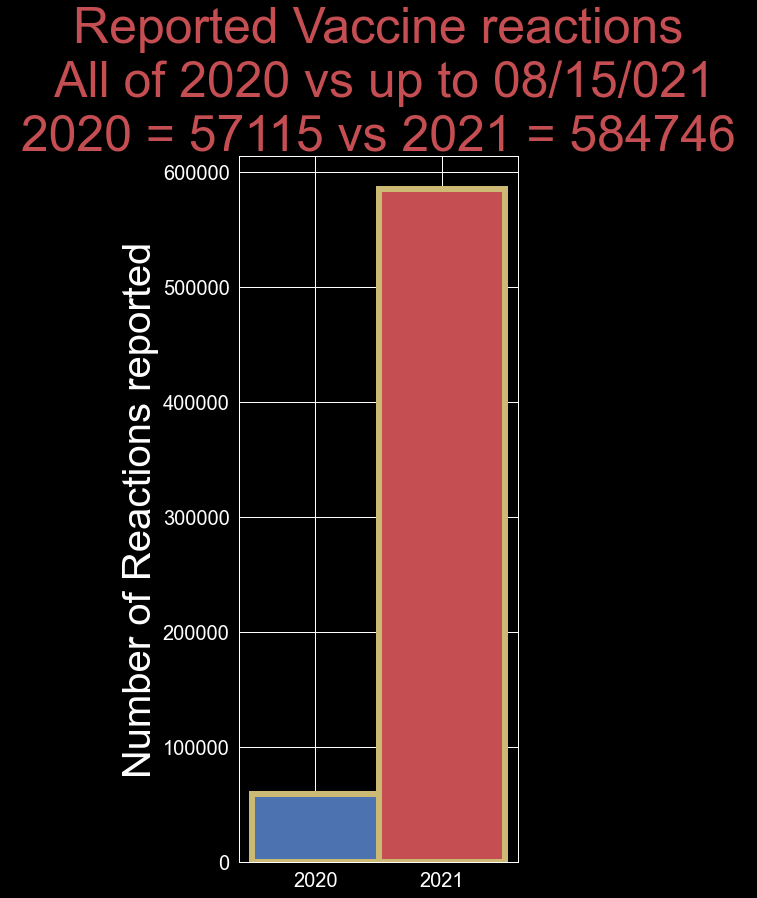

In [59]:
plt.style.use('dark_background')
a = len(v2020)
b = len(V_CDC)
fig, ax = plt.subplots(figsize=(5,13))
plt.title("Reported Vaccine reactions\n All of 2020 vs up to 08/15/021\n 2020 = 57115 vs 2021 = %i " %(b), fontsize=50, color='r')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Number of Reactions reported", fontsize=40)
ax.bar([1,2], [a,b], width=1, tick_label=['2020','2021'], align='center', color=['b', 'r'], edgecolor='y', linewidth=6)


In [60]:
VM_CDC_A.describe()

VAERS_ID        AGE_YRS        CAGE_YR     CAGE_MO      HOSPDAYS  \
count  5.835780e+05  476849.000000  384157.000000  836.000000  22763.000000   
mean   1.229518e+06      48.861060      48.298545    0.040789     13.842639   
std    1.798083e+05      18.562192      18.552600    0.132317    937.329805   
min    9.028540e+05       0.080000       0.000000    0.000000      1.000000   
25%    1.075100e+06      34.000000      34.000000    0.000000      2.000000   
50%    1.228828e+06      48.000000      48.000000    0.000000      3.000000   
75%    1.383993e+06      63.000000      63.000000    0.000000      6.000000   
max    1.553455e+06     119.000000     120.000000    1.000000  99999.000000   

             NUMDAYS      FORM_VERS  SYMPTOMVERSION1  SYMPTOMVERSION2  \
count  524466.000000  583578.000000    583578.000000    481563.000000   
mean       19.421314       1.999488        23.850793        23.848143   
std       561.253120       0.022630         0.334700         0.337062   
min         0.000000       1.000000        23.100000        23.100000   
25%         0.000000       2.000000        24.000000        24.000000   
50%         1.000000       2.000000        24.000000        24.000000   
75%         4.000000       2.000000        24.000000        24.000000   
max     36896.000000       2.000000        24.000000        24.000000   

       SYMPTOMVERSION3  SYMPTOMVERSION4  SYMPTOMVERSION5  
count    386227.000000    298327.000000    223156.000000  
mean         23.844478        23.841125        23.833875  
std           0.340269         0.343142         0.349164  
min          23.100000        23.100000        23.100000  
25%          24.000000        24.000000        24.000000  
50%          24.000000        24.000000        24.000000  
75%          24.000000        24.000000        24.000000  
max          24.000000        24.000000        24.000000

In [61]:
vyouth= VM_CDC_A.loc[VM_CDC_A['DIED']=='Y']
vyouth = vyouth.loc[vyouth['AGE_YRS']<1]
pd.set_option('display.max_colwidth', None)
print(vyouth[['VAERS_ID', 'AGE_YRS', 'DATEDIED', 'SYMPTOM_TEXT']])


        VAERS_ID  AGE_YRS    DATEDIED  \
207271   1166062     0.42  03/20/2021   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            SYMPTOM_TEXT  
207271  Patient received second dose of Pfizer vaccine on March 17, 2020 while at work. March 18, 2020 her 5 month old breastfed infant developed a rash and within 24 hours was inconsolable, refusing to eat, and developed a fever. Patient brought baby to local ER where assessments were performed, blood analysis revealed elevated liver enzymes. Infant was hospitalized but continued to decline

In [62]:
VM_CDC_A['SYMPTOM_TEXT'].fillna('none', inplace=True)
VM_CDC_A['SYMPTOM_TEXT'] = VM_CDC_A['SYMPTOM_TEXT'].str.lower()
symp = VM_CDC_A.loc[VM_CDC_A["SYMPTOM_TEXT"].str.contains('suicide')]

In [63]:
pd.set_option('display.max_colwidth', None)
symp[['AGE_YRS', 'SYMPTOM_TEXT', 'CUR_ILL']]

AGE_YRS  \
58043      26.0   
104088      NaN   
163285     28.0   
164517     93.0   
172447     65.0   
...         ...   
308898     29.0   
364264     41.0   
450389      NaN   
677921     58.0   
678196      NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   SYMPTOM_TEXT  \
58043                                           

In [64]:
wd = pd.DataFrame()
stopwords = set(STOPWORDS)
stopwords.update(['Injection', 'Product', 'Administered','Blood Test', 'AUTOPSY', ' AUTOPSY' 'Quality', 'None', 'Test', 'Negative', 'Normal', 'Full Blood','Blood Test', 'Computerised', 'Site', ' Echocardiogram Normal', 'Electrocardiogram',  
                   'Echocardiogram', ' Normal'])
wd['words'] = VM_CDC.SYMPTOM1 + ', '+ VM_CDC.SYMPTOM2 + ', ' + VM_CDC.SYMPTOM3 + ', ' + VM_CDC.SYMPTOM4 + ', ' + VM_CDC.SYMPTOM5


In [65]:
wd['words'].str.contains('myo', flags=re.IGNORECASE, regex=True).value_counts()

False    220898
True       2258
Name: words, dtype: int64

In [66]:
wd['words']=wd['words'].fillna('None')

In [67]:
wd.words.value_counts().head(15)

None                                                                                                                           360422
Chills, Fatigue, Headache, Pain, Pyrexia                                                                                          484
Chills, Headache, Nausea, Pain, Pyrexia                                                                                           357
Chills, Fatigue, Headache, Nausea, Pain                                                                                           324
Arthralgia, Chills, Fatigue, Headache, Myalgia                                                                                    313
Injection site erythema, Injection site pain, Injection site pruritus, Injection site swelling, Injection site warmth             312
Chills, Fatigue, Headache, Myalgia, Pyrexia                                                                                       187
Chills, Fatigue, Headache, Myalgia, Nausea                    

In [68]:
text = " ".join(r for r in wd.words)
text = text.title()
print(len(text))

18434311


In [69]:
wordcloud=WordCloud(stopwords=stopwords, background_color='white', margin=5, width=2400, height=1400, ranks_only=True).generate(text)

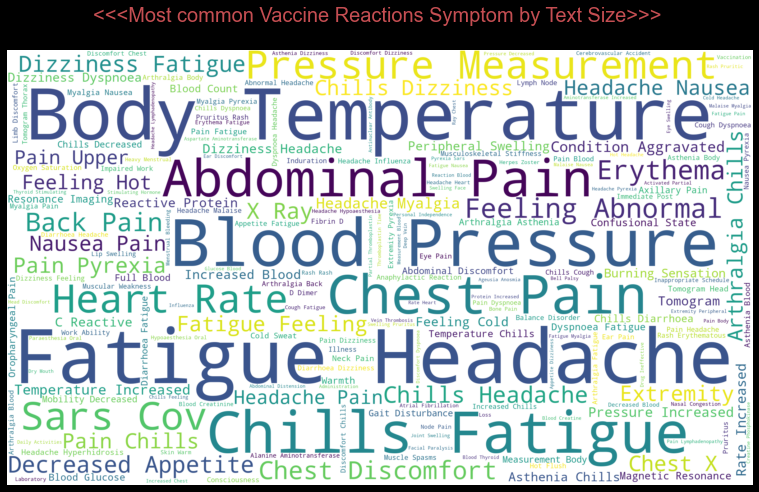

In [70]:
plt.figure(figsize=FIGSIZE)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("<<<Most common Vaccine Reactions Symptom by Text Size>>> \n", fontsize=20, color='r')
plt.axis('off')
plt.show()

In [71]:
import collections
import matplotlib.cm as cm
filtered_words = [ word for word in text.split(',') if word not in stopwords]
counted_words = collections.Counter(filtered_words)
words=[]
counts=[]
for letter, count in counted_words.most_common(30):
    words.append(letter)
    counts.append(count)
print(words)

[' Headache', ' Fatigue', ' Chills', ' Dizziness', ' Dyspnoea', ' Nausea', ' Pain', ' Injection Site Pain', ' Diarrhoea', ' Myalgia', ' Body Temperature', ' Chest Pain', ' Pain In Extremity', ' Cough', ' Hyperhidrosis', ' Feeling Abnormal', ' Asthenia', ' Blood Pressure Measurement', ' Pyrexia', ' Blood Test', ' Malaise', ' Injection Site Erythema', ' Decreased Appetite', ' Erythema', ' Injection Site Pruritus', ' Hypoaesthesia', ' Injection Site Swelling', ' Electrocardiogram', ' Chest Discomfort', ' Lymphadenopathy']


<BarContainer object of 30 artists>

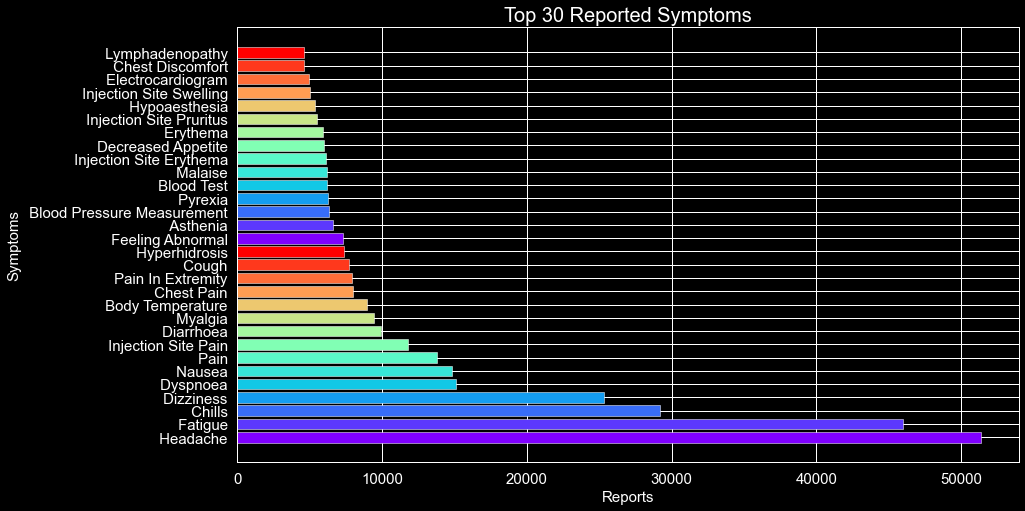

In [72]:
colors = cm.rainbow(np.linspace(0,1,15))
plt.figure(figsize=FIGSIZE)
plt.title("Top 30 Reported Symptoms", fontsize=20)
plt.xlabel("Reports", fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Symptoms", fontsize=15)
plt.yticks(fontsize=15)
plt.barh(words, counts, color=colors)

In [73]:
DM_VM_CDC = D_V_CDC.loc[D_V_CDC['DIED']=='Y']


In [74]:
wd = pd.DataFrame()
stopwords = set(STOPWORDS)
stopwords.update(['Injection', 'Product', 'Administered','Blood Test', 'AUTOPSY', ' AUTOPSY' 'Quality', 'None', 'Test', 'Negative', 'Normal', 'Full Blood','Blood Test', 'Computerised', 'Site', ' Echocardiogram Normal', 'Electrocardiogram',  
                   'Echocardiogram', ' Normal'])
wd['words'] = DM_VM_CDC.SYMPTOM1 + ', '+ DM_VM_CDC.SYMPTOM2 + ', ' + DM_VM_CDC.SYMPTOM3 + ', ' + DM_VM_CDC.SYMPTOM4 + ', ' + DM_VM_CDC.SYMPTOM5
wd['words'] = wd['words'].fillna('None')

In [75]:
text = " ".join(r for r in wd.words)
text = text.title()
print(len(text))

1239738


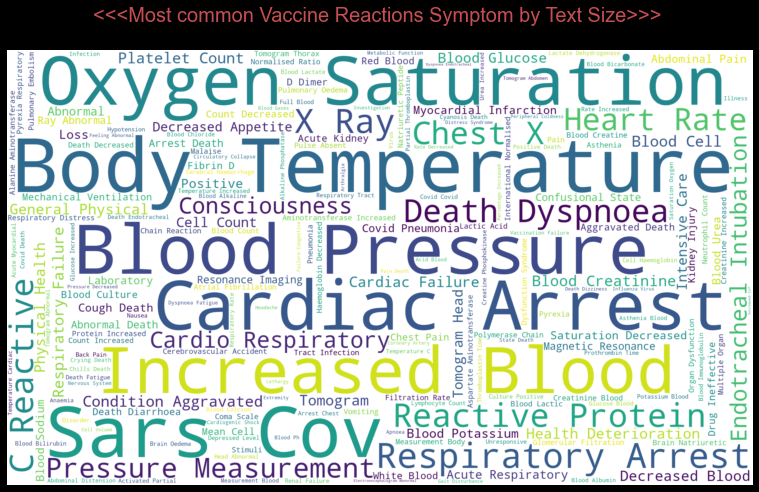

In [76]:
wordcloud=WordCloud(stopwords=stopwords, background_color='white', margin=5, width=2400, height=1400, ranks_only=True).generate(text)
plt.figure(figsize=FIGSIZE)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("<<<Most common Vaccine Reactions Symptom by Text Size>>> \n", fontsize=20, color='r')
plt.axis('off')
plt.show()

In [77]:
wd['words']= wd['words'].fillna('None')
wd.value_counts().sort_values()

words                                                                                                 
LIVER FUNCTION TEST, MALAISE, MALNUTRITION, SARS-COV-2 TEST, VACCINATION FAILURE                              1
ACUTE CORONARY SYNDROME, ANGINA UNSTABLE, ANGIOGRAM, BLOOD PRESSURE MEASUREMENT, CARDIAC STRESS TEST          1
ABNORMAL BEHAVIOUR, AGGRESSION, BEDRIDDEN, BLOOD GLUCOSE INCREASED, CONDITION AGGRAVATED                      1
ACUTE KIDNEY INJURY, ANXIETY, ASTHENIA, BLOOD GASES ABNORMAL, COVID-19                                        1
ACUTE KIDNEY INJURY, APLASIA, BLOOD BICARBONATE, BLOOD BICARBONATE DECREASED, BLOOD CALCIUM                   1
                                                                                                          ...  
COMA SCALE, COMPUTERISED TOMOGRAM, COMPUTERISED TOMOGRAM HEAD, FALL, HEART RATE                              14
BLOOD PH, BLOOD POTASSIUM, BLOOD PRESSURE MEASUREMENT, CARDIOGENIC SHOCK, CHEST INJURY                       14
B

In [78]:
filtered_words = [ word for word in text.split(',') if word not in stopwords]
counted_words = collections.Counter(filtered_words)
wordsd=[]
counts=[]
for letter, count in counted_words.most_common(30):
    wordsd.append(letter)
    counts.append(count)
print(wordsd)

[' Death', ' Dyspnoea', ' Pyrexia', ' Cardiac Arrest', ' Fatigue', ' Body Temperature', ' Covid-19', ' Cough', ' Cardio-Respiratory Arrest', ' Malaise', ' Pneumonia', ' Diarrhoea', ' Blood Pressure Measurement', ' Oxygen Saturation', ' Condition Aggravated', ' Endotracheal Intubation', ' General Physical Health Deterioration', ' Decreased Appetite', ' Autopsy', ' Resuscitation', ' Headache', ' Asthenia', ' Computerised Tomogram', ' Intensive Care', ' Fall', ' C-Reactive Protein', ' Heart Rate', ' Cyanosis', ' Chills', ' Nausea']


<BarContainer object of 30 artists>

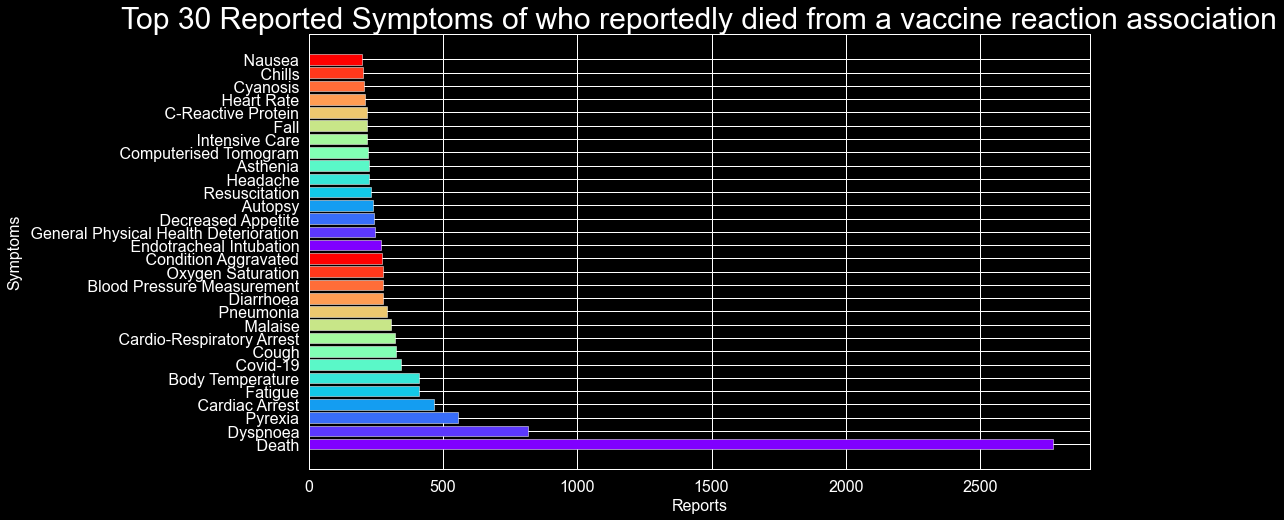

In [79]:
colors = cm.rainbow(np.linspace(0,1,15))
plt.style.use('dark_background')
plt.figure(figsize=FIGSIZE)
plt.title("Top 30 Reported Symptoms of who reportedly died from a vaccine reaction association", fontsize=30)
plt.xlabel("Reports", fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel("Symptoms", fontsize=16)
plt.yticks(fontsize=16)
plt.barh(wordsd, counts, color=colors)

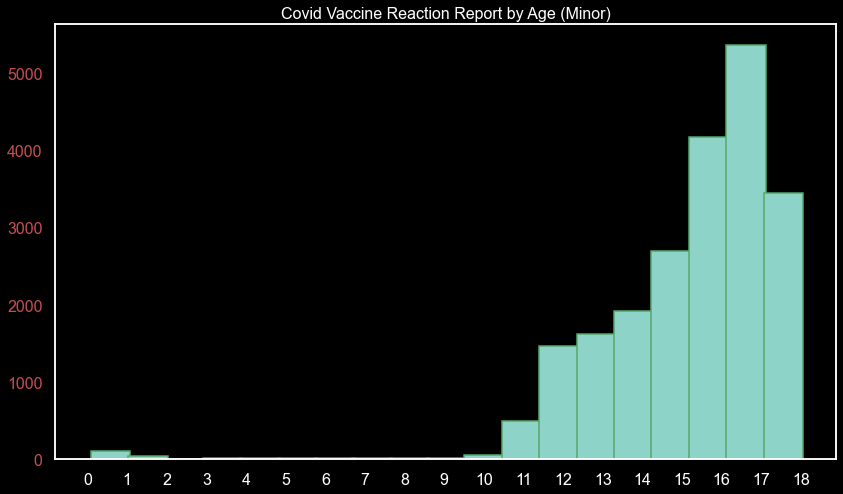

In [113]:
VM_CDC_Y = VM_CDC[VM_CDC['AGE_YRS']< 19]
plt.style.use('dark_background')
VM_CDC_Y['AGE_YRS'].hist(bins=19, width=1, figsize=FIGSIZE, edgecolor='g')
plt.title("Covid Vaccine Reaction Report by Age (Minor)", fontsize=16)
plt.xticks(np.arange(0,19,1), fontsize=16)
plt.yticks(fontsize=16, color='r')
plt.grid(color='r')
plt.show()

In [122]:
VM_CDC_YD= VM_CDC_Y[VM_CDC_Y['DIED'] == 'Y']
pd.set_option('display.max_colwidth', 0)
len(VM_CDC_YD)


26

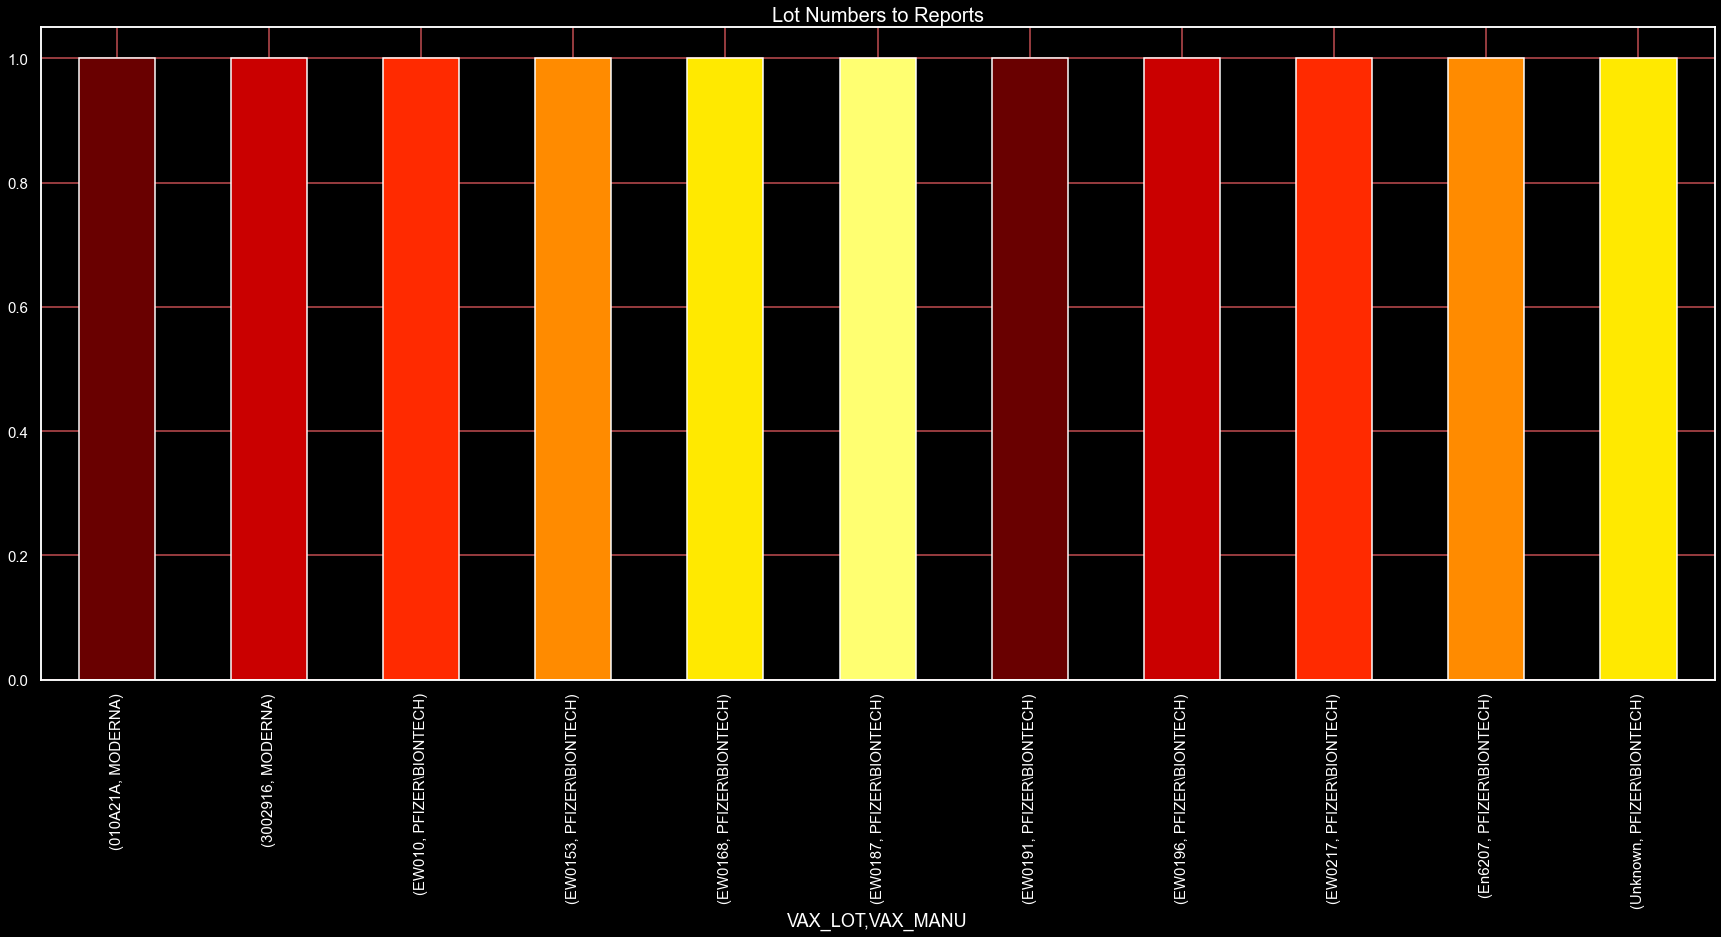

In [120]:
sns.set(font_scale=5)
plt.style.use('dark_background')
sns.set_context("talk")
plt.grid(color='r', visible=True)
VM_CDC_YD[["VAX_LOT", "VAX_MANU"]].value_counts().head(50).plot(kind='bar', figsize=FIGSIZE3, color= sns.color_palette("hot"))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Lot Numbers to Reports', fontsize=20)
plt.show()

95.40444444444445


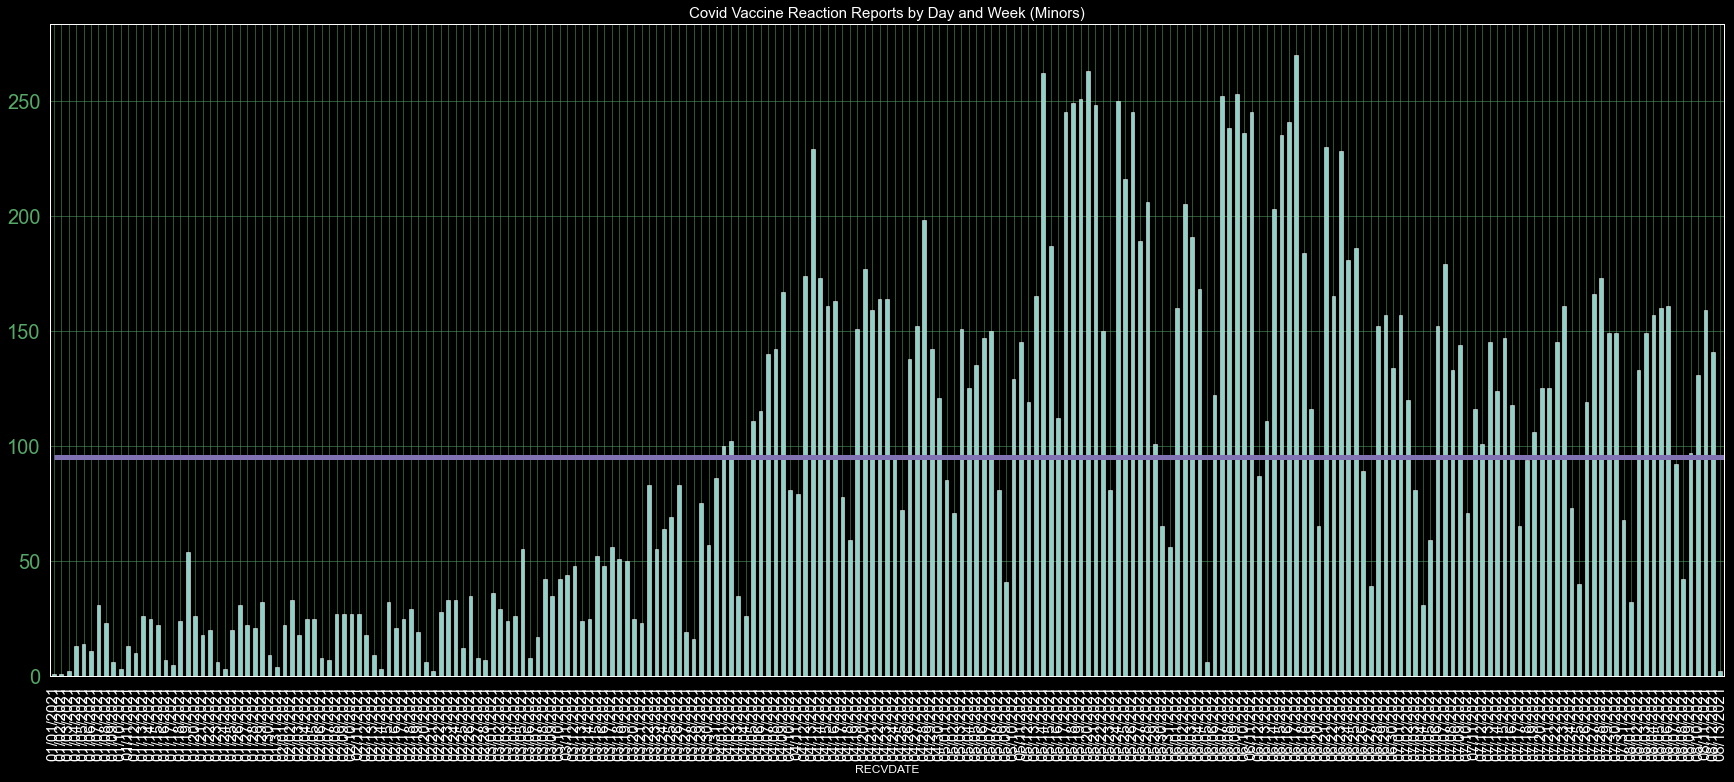

In [81]:
plt.figure(figsize=FIGSIZE3)
x1 = VM_CDC_Y.groupby("RECVDATE")['VAX_TYPE'].count().rolling(1, min_periods=1).sum()
ax2 = VM_CDC_Y.groupby("RECVDATE")['VAX_TYPE'].count()
ax3 = VM_CDC_Y.groupby('RECVDATE')['VAX_TYPE'].count().mean()

ax2.plot(kind='bar')
plt.hlines(ax3, 0, len(ax2), linewidth=5, color='m')
plt.title("Covid Vaccine Reaction Reports by Day and Week (Minors)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20, color='g')
plt.grid(color='g', alpha=.5, visible=True)
plt.show
print(ax3)

In [82]:
VM_CDC_Y['RECVDATE'] = pd.to_datetime(VM_CDC_Y['RECVDATE'])
VM_CDC_Y['VAX_DATE'] = pd.to_datetime(VM_CDC_Y['VAX_DATE'])


<ipython-input-82-a084bc18e475>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VM_CDC_Y['RECVDATE'] = pd.to_datetime(VM_CDC_Y['RECVDATE'])
<ipython-input-82-a084bc18e475>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VM_CDC_Y['VAX_DATE'] = pd.to_datetime(VM_CDC_Y['VAX_DATE'])


In [83]:
VM_CDC_Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21466 entries, 10 to 691316
Data columns (total 52 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   VAERS_ID         21466 non-null  int64         
 1   RECVDATE         21466 non-null  datetime64[ns]
 2   STATE            19752 non-null  object        
 3   AGE_YRS          21466 non-null  float64       
 4   CAGE_YR          19726 non-null  float64       
 5   CAGE_MO          113 non-null    float64       
 6   SEX              21466 non-null  object        
 7   RPT_DATE         10 non-null     object        
 8   SYMPTOM_TEXT     21438 non-null  object        
 9   DIED             26 non-null     object        
 10  DATEDIED         23 non-null     object        
 11  L_THREAT         247 non-null    object        
 12  ER_VISIT         3 non-null      object        
 13  HOSPITAL         1296 non-null   object        
 14  HOSPDAYS         854 non-null    flo

In [84]:
VM_CDC_X = VM_CDC_Y.copy()
VM_CDC_X["Days_From_Shot_to_Report"] = VM_CDC_X["RECVDATE"] - VM_CDC_X['VAX_DATE']
VM_CDC_X["Days_From_Shot_to_Report"] = VM_CDC_X["Days_From_Shot_to_Report"]/np.timedelta64(1,'D')

In [85]:
a = VM_CDC_X["Days_From_Shot_to_Report"].mean()
print("Average Number of Dates from Vaccination to report(Youth) = ", a)

Average Number of Dates from Vaccination to report(Youth) =  24.928719690536845


In [86]:
VM_CDC_X.head(1)

VAERS_ID   RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
10    916610 2021-01-01    VA     18.0     18.0      NaN   F      NaN   

                                                                    SYMPTOM_TEXT  \
10  hives and rash all over body that has not gone away in 2 days since it began   

   DIED DATEDIED L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD  \
10  NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN      N   

     VAX_DATE  ONSET_DATE  NUMDAYS LAB_DATA V_ADMINBY V_FUNDBY OTHER_MEDS  \
10 2020-12-29  12/30/2020      1.0      NaN       PVT      NaN        NaN   

   CUR_ILL HISTORY PRIOR_VAX SPLTTYPE  FORM_VERS TODAYS_DATE BIRTH_DEFECT  \
10     NaN     NaN       NaN      NaN          2  01/01/2021          NaN   

   OFC_VISIT ER_ED_VISIT  ALLERGIES VAX_TYPE VAX_MANU VAX_LOT VAX_DOSE_SERIES  \
10       NaN         NaN  jackfruit  COVID19  MODERNA     NaN               1   

   VAX_ROUTE VAX_SITE                     VAX_NAME SYMPTOM1  SYMPTOMVERSION1  \
10       SYR       LA  COVID19 (COVID19 (MODERNA))     Rash             23.1   

     SYMPTOM2  SYMPTOMVERSION2 SYMPTOM3  SYMPTOMVERSION3 SYMPTOM4  \
10  Urticaria             23.1      NaN              NaN      NaN   

    SYMPTOMVERSION4 SYMPTOM5  SYMPTOMVERSION5  Days_From_Shot_to_Report  
10              NaN      NaN              NaN                       3.0

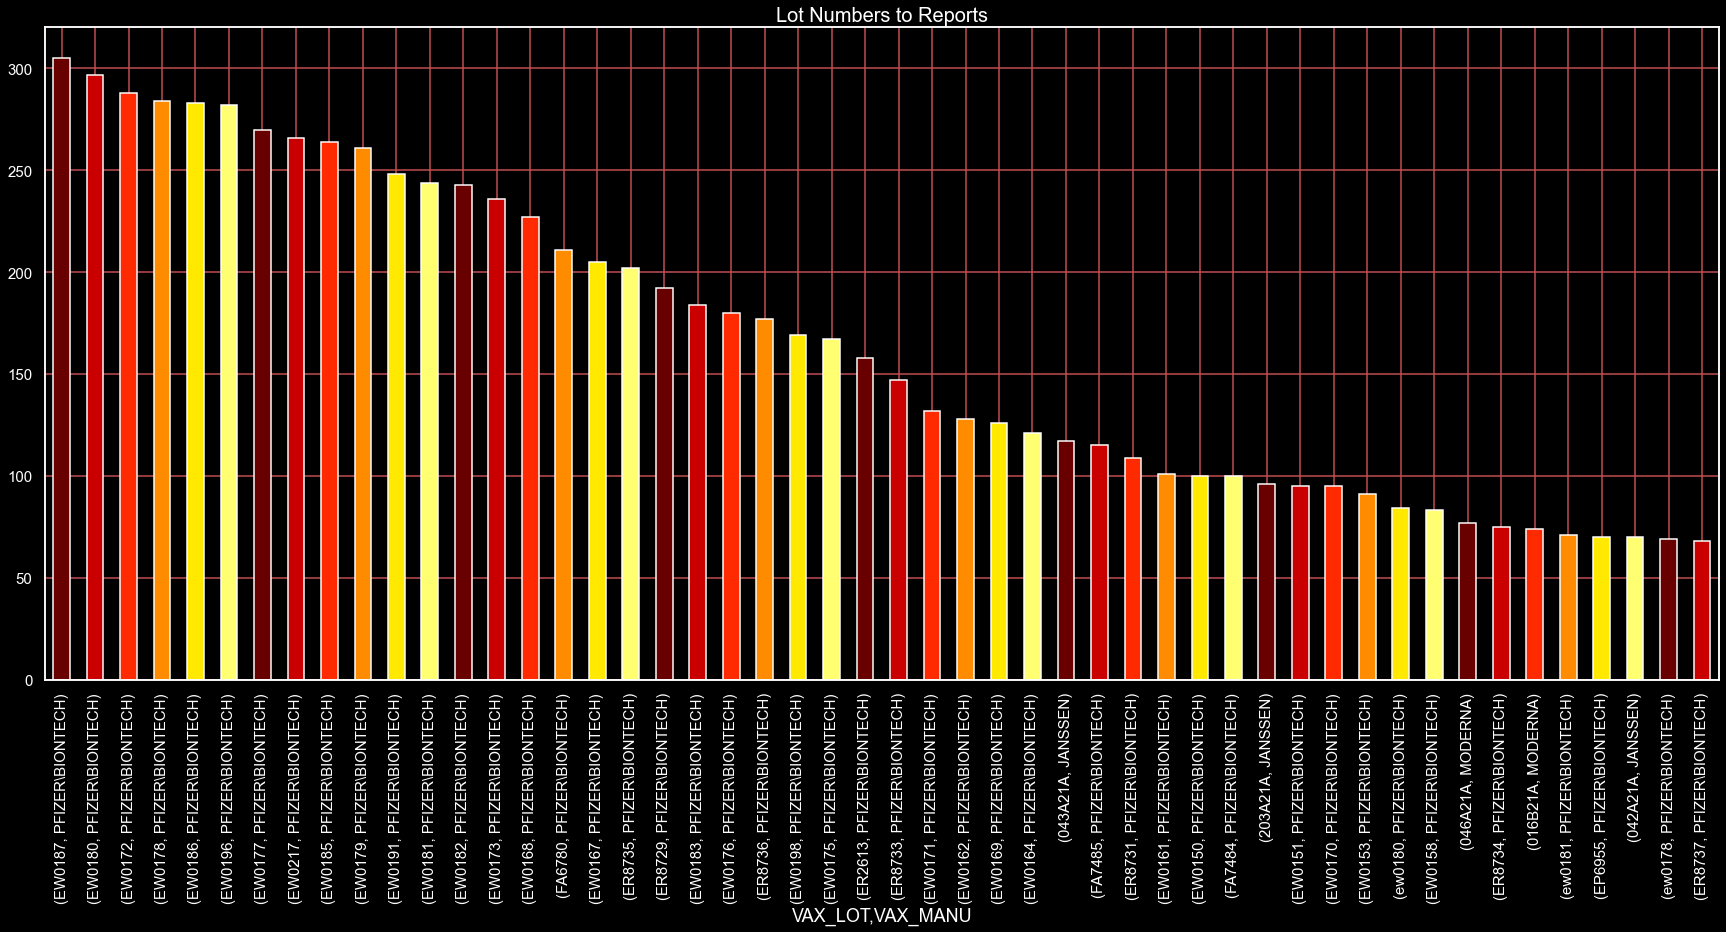

In [87]:
sns.set(font_scale=5)
plt.style.use('dark_background')
sns.set_context("talk")
plt.grid(color='r', visible=True)
VM_CDC_X[["VAX_LOT", "VAX_MANU"]].value_counts().head(50).plot(kind='bar', figsize=FIGSIZE3, color= sns.color_palette("hot"))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Lot Numbers to Reports', fontsize=20)
plt.show()

In [88]:
VM_CDC_X[['VAX_MANU', 'VAX_LOT']].value_counts()

VAX_MANU         VAX_LOT
PFIZER\BIONTECH  EW0187     305
                 EW0180     297
                 EW0172     288
                 EW0178     284
                 EW0186     283
                           ... 
                 023C2A       1
                 022B21A      1
                 021C21A      1
                 0217         1
                 ww0162       1
Length: 1695, dtype: int64

In [89]:
pd.set_option('display.max_colwidth', 100)
VM_CDC_Y = VM_CDC_A.loc[VM_CDC_A['AGE_YRS']<19]
VM_CDC_Y.tail(15)

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
677984   1492650  07/22/2021    FR     18.0      NaN      NaN   M      NaN   
677988   1492654  07/22/2021    FR     18.0      NaN      NaN   F      NaN   
678153   1493281  07/22/2021    FR     18.0      NaN      NaN   F      NaN   
678168   1493296  07/22/2021    FR     18.0      NaN      NaN   M      NaN   
678301   1493508  07/22/2021    FR     18.0      NaN      NaN   M      NaN   
679942   1497608  07/23/2021    FR     18.0      NaN      NaN   M      NaN   
680095   1497828  07/23/2021    FR     18.0      NaN      NaN   M      NaN   
685670   1509121  07/28/2021    FR     18.0      NaN      NaN   F      NaN   
686861   1511459  07/29/2021    FR     16.0      NaN      NaN   F      NaN   
690825   1525209  08/04/2021    FR     18.0      NaN      NaN   F      NaN   
690940   1527890  08/05/2021    FR     18.0      NaN      NaN   M      NaN   
691226   1539996  08/10/2021    FR     18.0      NaN      NaN   M      NaN   
691254   1544774  08/11/2021    FR     18.0      NaN      NaN   F      NaN   
691314   1547128  08/12/2021    FR     18.0      NaN      NaN   F      NaN   
691316   1547168  08/12/2021    FR     18.0      NaN      NaN   F      NaN   

                                                                                               SYMPTOM_TEXT  \
677984  reaction at or around the injection site hardening, onset later than a week after the vaccinatio...   
677988  joint pain; nausea; headache; fatigue; fever 40.5 to 42 degrees celsius; this spontaneous report...   
678153  unstable on the legs; reaction at the injection site; feeling unwell; cold chills; joint pain; m...   
678168  cold chills; feeling unwell; headache; fever; nausea; this spontaneous report received from a co...   
678301  fever; fatigue; headache; muscle pain; this spontaneous report received from a consumer via a re...   
679942  vomiting; feeling unwell; cold chills; fever; nausea; muscle pain; fatigue; headache; this spont...   
680095  cold chills; fatigue; fever; headache; this spontaneous report received from a consumer via a re...   
685670  reaction at the injection site; cold chills; feeling unwell; headache; nausea; fatigue; fever; t...   
686861  loss of consciousness; this spontaneous report received from a physician via a regulatory author...   
690825  shivering; feeling unwell; joint pain; fever; fatigue; nausea; headache; muscle pain; this spont...   
690940  reaction at or around the injection site: pain; fainted 2 minutes after vaccination; this sponta...   
691226  syncope; liquid is much fatter; severe pain; this spontaneous report received from a health care...   
691254  amn acute macular neuroretinopathy left eye; autoimmune disorder; this spontaneous report receiv...   
691314  shortness of breath; swollen tongue; tight chested; tachycardia; hypersensitivity to skin upon c...   
691316  fainting; this spontaneous report received from a health care professional via a regulatory auth...   

       DIED DATEDIED L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE  \
677984  NaN      NaN        Y      NaN      NaN       NaN    NaN     NaN   
677988  NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN   
678153  NaN      NaN      NaN      NaN      NaN       NaN    NaN       Y   
678168  NaN      NaN      NaN      NaN      NaN       NaN    NaN       Y   
678301  NaN      NaN      NaN      NaN      NaN       NaN    NaN       Y   
679942  NaN      NaN      NaN      NaN      NaN       NaN    NaN       Y   
680095  NaN      NaN      NaN      NaN      NaN       NaN    NaN       Y   
685670  NaN      NaN      NaN      NaN      NaN       NaN    NaN       Y   
686861  NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN   
690825  NaN      NaN      NaN      NaN      NaN       NaN    NaN       Y   
690940  NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN   
691226  NaN      NaN      NaN      NaN      NaN       NaN    NaN     N

In [90]:
wdy=pd.DataFrame()
wdy['words'] = VM_CDC_Y.SYMPTOM1 + ', ' + VM_CDC_Y.SYMPTOM2 + ', ' +VM_CDC_Y.SYMPTOM3 + ', ' +VM_CDC_Y.SYMPTOM4 + ', ' +VM_CDC_Y.SYMPTOM5
wdy['words'] = wdy['words'].fillna('None')
wdy.value_counts().sort_values()

words                                                                                                                                         
Dizziness, Flushing, Hyperhidrosis, Nausea, Presyncope                                                                                                1
Abdominal pain lower, Body temperature increased, Ear pain, Lip swelling, Oral herpes                                                                 1
Abdominal pain upper, Activated partial thromboplastin time normal, Alanine aminotransferase increased, Albumin globulin ratio normal, Anaemia        1
Abdominal pain upper, Acute myocardial infarction, Back pain, C-reactive protein normal, Computerised tomogram abdomen normal                         1
Abdominal pain upper, Adenovirus test, Alanine aminotransferase increased, Aspartate aminotransferase increased, Back pain                            1
                                                                                                 

In [91]:
texty = ' '.join(r for r in wdy.words)
texty = texty.title()
print(len(texty))
wordcloudy=WordCloud(stopwords=stopwords, background_color="white", margin=5, width=2400, height=1400, ranks_only=True).generate(texty)


441321


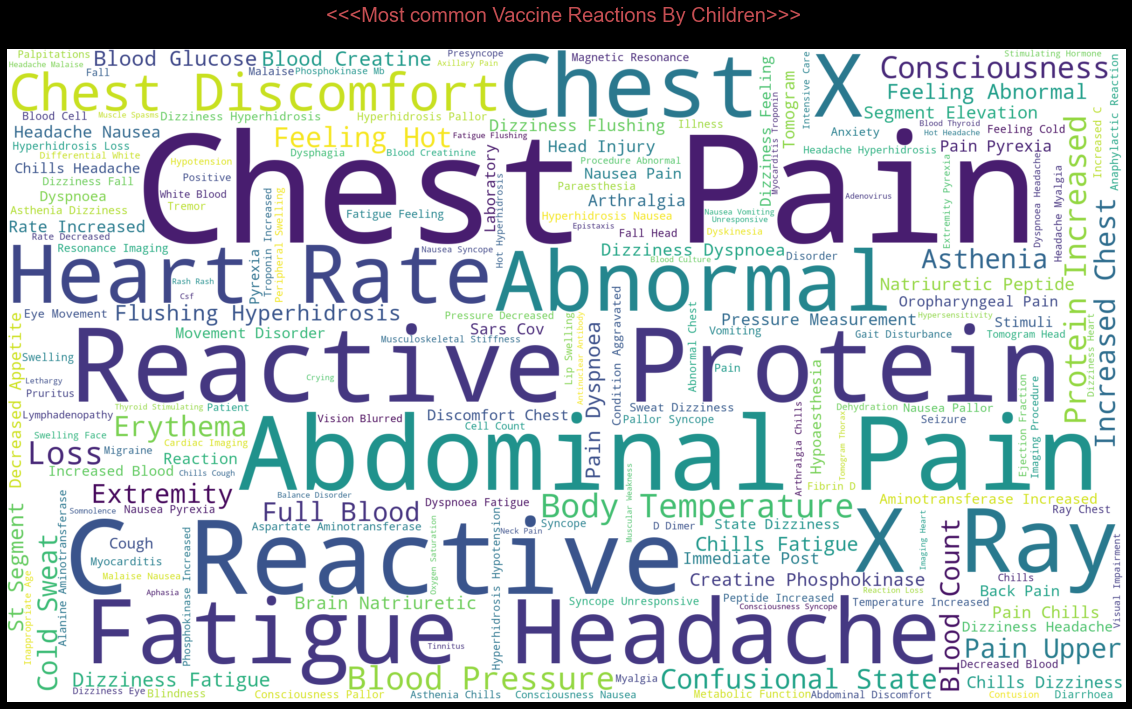

In [92]:
plt.figure(figsize=FIGSIZE3)
plt.imshow(wordcloudy, interpolation='bilinear')
plt.title("<<<Most common Vaccine Reactions By Children>>> \n", fontsize=20, color='r')
plt.axis('off')
plt.show()

In [93]:
filtered_words = [ word for word in texty.split(',') if word not in stopwords]
counted_words = collections.Counter(filtered_words)
wordsy=[]
counts=[]
for letter, count in counted_words.most_common(30):
    wordsy.append(letter)
    counts.append(count)
print(wordsy)

[' Headache', ' Dizziness', ' Fatigue', ' Chest Pain', ' Hyperhidrosis', ' Nausea', ' Dyspnoea', ' Chills', ' Loss Of Consciousness', ' Pallor', ' Pain', ' Flushing', ' Fall', ' Electrocardiogram', ' Malaise', ' Pyrexia', ' Syncope', ' Feeling Hot', ' Chest Discomfort', ' Electrocardiogram Normal', ' C-Reactive Protein Increased', ' Pain In Extremity', ' Injection Site Pain', ' Hypotension', ' Cough', ' Feeling Abnormal', ' Head Injury', ' Electrocardiogram St Segment Elevation', ' Immediate Post-Injection Reaction', ' Confusional State']


<BarContainer object of 30 artists>

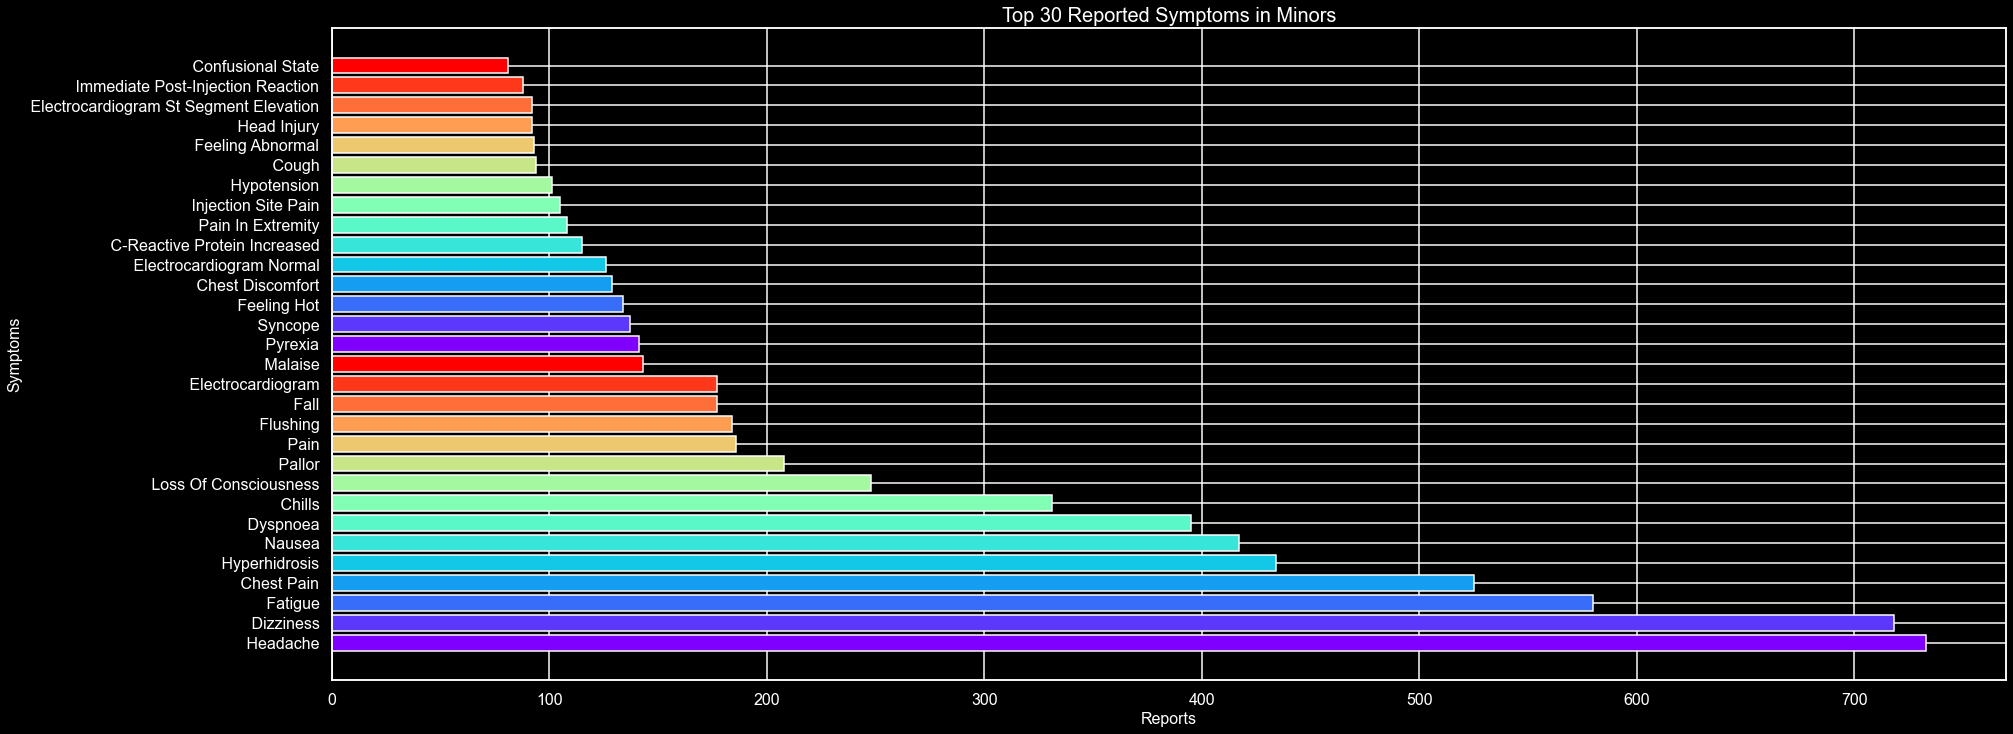

In [94]:
colors = cm.rainbow(np.linspace(0,1,15))
plt.style.use('dark_background')
plt.figure(figsize=FIGSIZE3)
plt.title("Top 30 Reported Symptoms in Minors", fontsize=20)
plt.xlabel("Reports", fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel("Symptoms", fontsize=16)
plt.yticks(fontsize=16)
plt.barh(wordsy, counts, color=colors)

In [95]:
#df = VM_CDC = VM_CDC_Y.copy()
#df['Date'] = pd.to_datetime(df['Date']) - pd.to_datetime(7, unit='d')
#df = df.groupby(['Name', pd.Grouper(key='Date', freq='W-MON')])["Quantity"]
#    .sum()
#    .reset_index()
#    .sort_values('Date')
#print(df)

In [96]:
VM_CDC_A.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [97]:
usv.query('new_vaccinations > 0')

date  new_vaccinations
105617 2020-12-21           57909.0
105632 2021-01-05          273209.0
105633 2021-01-06          470328.0
105634 2021-01-07          612621.0
105635 2021-01-08          768813.0
...           ...               ...
105856 2021-08-17          602938.0
105857 2021-08-18          704840.0
105858 2021-08-19         1023545.0
105859 2021-08-20         1010907.0
105860 2021-08-21         1050277.0

[217 rows x 2 columns]

In [98]:
VAERS = pd.DataFrame()
VM_CDC_A['VAERS']=int(1)
VM_CDC_A['WEEK'] = pd.to_datetime(VM_CDC_A['RECVDATE']) - pd.to_timedelta(7,unit='d')
VAERS = VM_CDC_A.groupby([pd.Grouper(key='WEEK', freq="W-MON")])['VAERS'].sum().reset_index().sort_values('WEEK')

In [99]:
VAERS

WEEK  VAERS
0  2020-12-14      3
1  2020-12-21    120
2  2020-12-28   2860
3  2021-01-04  17448
4  2021-01-11  16026
5  2021-01-18  17155
6  2021-01-25  18570
7  2021-02-01  19529
8  2021-02-08  16282
9  2021-02-15  14432
10 2021-02-22  15664
11 2021-03-01  18006
12 2021-03-08  19089
13 2021-03-15  20522
14 2021-03-22  20316
15 2021-03-29  23395
16 2021-04-05  27814
17 2021-04-12  30202
18 2021-04-19  28167
19 2021-04-26  22123
20 2021-05-03  18987
21 2021-05-10  19315
22 2021-05-17  17853
23 2021-05-24  15920
24 2021-05-31  15906
25 2021-06-07  16451
26 2021-06-14  16436
27 2021-06-21  14628
28 2021-06-28  14039
29 2021-07-05  15856
30 2021-07-12  19123
31 2021-07-19  15501
32 2021-07-26  16601
33 2021-08-02   9586
34 2021-08-09   9653

In [100]:
VAERS.set_index("WEEK")

VAERS
WEEK             
2020-12-14      3
2020-12-21    120
2020-12-28   2860
2021-01-04  17448
2021-01-11  16026
2021-01-18  17155
2021-01-25  18570
2021-02-01  19529
2021-02-08  16282
2021-02-15  14432
2021-02-22  15664
2021-03-01  18006
2021-03-08  19089
2021-03-15  20522
2021-03-22  20316
2021-03-29  23395
2021-04-05  27814
2021-04-12  30202
2021-04-19  28167
2021-04-26  22123
2021-05-03  18987
2021-05-10  19315
2021-05-17  17853
2021-05-24  15920
2021-05-31  15906
2021-06-07  16451
2021-06-14  16436
2021-06-21  14628
2021-06-28  14039
2021-07-05  15856
2021-07-12  19123
2021-07-19  15501
2021-07-26  16601
2021-08-02   9586
2021-08-09   9653

In [101]:
usv.set_index('date', inplace=True)
usv.index.rename('WEEK',inplace=True)

In [102]:
usv = usv.groupby(pd.Grouper(level = 'WEEK', freq="W-Mon", axis=0)).sum()
usv=usv.query('new_vaccinations > 0')

In [103]:
V_P = pd.merge_asof(usv, VAERS, on = 'WEEK', direction ='nearest')

In [104]:
V_P

WEEK  new_vaccinations  VAERS
0  2020-12-21           57909.0    120
1  2021-01-11         2124971.0  16026
2  2021-01-18         3291858.0  17155
3  2021-01-25         7026655.0  18570
4  2021-02-01         9488159.0  19529
5  2021-02-08        10195215.0  16282
6  2021-02-15        10466739.0  14432
7  2021-02-22         8957110.0  15664
8  2021-03-01        12722513.0  18006
9  2021-03-08        15189865.0  19089
10 2021-03-15        16992008.0  20522
11 2021-03-22        17427876.0  20316
12 2021-03-29        19303099.0  23395
13 2021-04-05        21374960.0  27814
14 2021-04-12        22504250.0  30202
15 2021-04-19        21889264.0  28167
16 2021-04-26        19187145.0  22123
17 2021-05-03        16011749.0  18987
18 2021-05-10        14819178.0  19315
19 2021-05-17        12812520.0  17853
20 2021-05-24        12478999.0  15920
21 2021-05-31         8037950.0  15906
22 2021-06-07         6447677.0  16451
23 2021-06-14         7793910.0  16436
24 2021-06-21         7930614.0  14628
25 2021-06-28         5837930.0  14039
26 2021-07-05         6189882.0  15856
27 2021-07-12         3386423.0  19123
28 2021-07-19         3646664.0  15501
29 2021-07-26         3964617.0  16601
30 2021-08-02         4712294.0   9586
31 2021-08-09         5008830.0   9653
32 2021-08-16         5358882.0   9653
33 2021-08-23         4392507.0   9653

In [105]:
V_P.set_index('WEEK', inplace=True)
V_P['percentage'] = round(V_P['VAERS']/V_P['new_vaccinations']*100,2)


In [106]:
V_PN = V_P.loc['2021-01-11':]
V_PN

new_vaccinations  VAERS  percentage
WEEK                                           
2021-01-11         2124971.0  16026        0.75
2021-01-18         3291858.0  17155        0.52
2021-01-25         7026655.0  18570        0.26
2021-02-01         9488159.0  19529        0.21
2021-02-08        10195215.0  16282        0.16
2021-02-15        10466739.0  14432        0.14
2021-02-22         8957110.0  15664        0.17
2021-03-01        12722513.0  18006        0.14
2021-03-08        15189865.0  19089        0.13
2021-03-15        16992008.0  20522        0.12
2021-03-22        17427876.0  20316        0.12
2021-03-29        19303099.0  23395        0.12
2021-04-05        21374960.0  27814        0.13
2021-04-12        22504250.0  30202        0.13
2021-04-19        21889264.0  28167        0.13
2021-04-26        19187145.0  22123        0.12
2021-05-03        16011749.0  18987        0.12
2021-05-10        14819178.0  19315        0.13
2021-05-17        12812520.0  17853        0.14
2021-05-24        12478999.0  15920        0.13
2021-05-31         8037950.0  15906        0.20
2021-06-07         6447677.0  16451        0.26
2021-06-14         7793910.0  16436        0.21
2021-06-21         7930614.0  14628        0.18
2021-06-28         5837930.0  14039        0.24
2021-07-05         6189882.0  15856        0.26
2021-07-12         3386423.0  19123        0.56
2021-07-19         3646664.0  15501        0.43
2021-07-26         3964617.0  16601        0.42
2021-08-02         4712294.0   9586        0.20
2021-08-09         5008830.0   9653        0.19
2021-08-16         5358882.0   9653        0.18
2021-08-23         4392507.0   9653        0.22

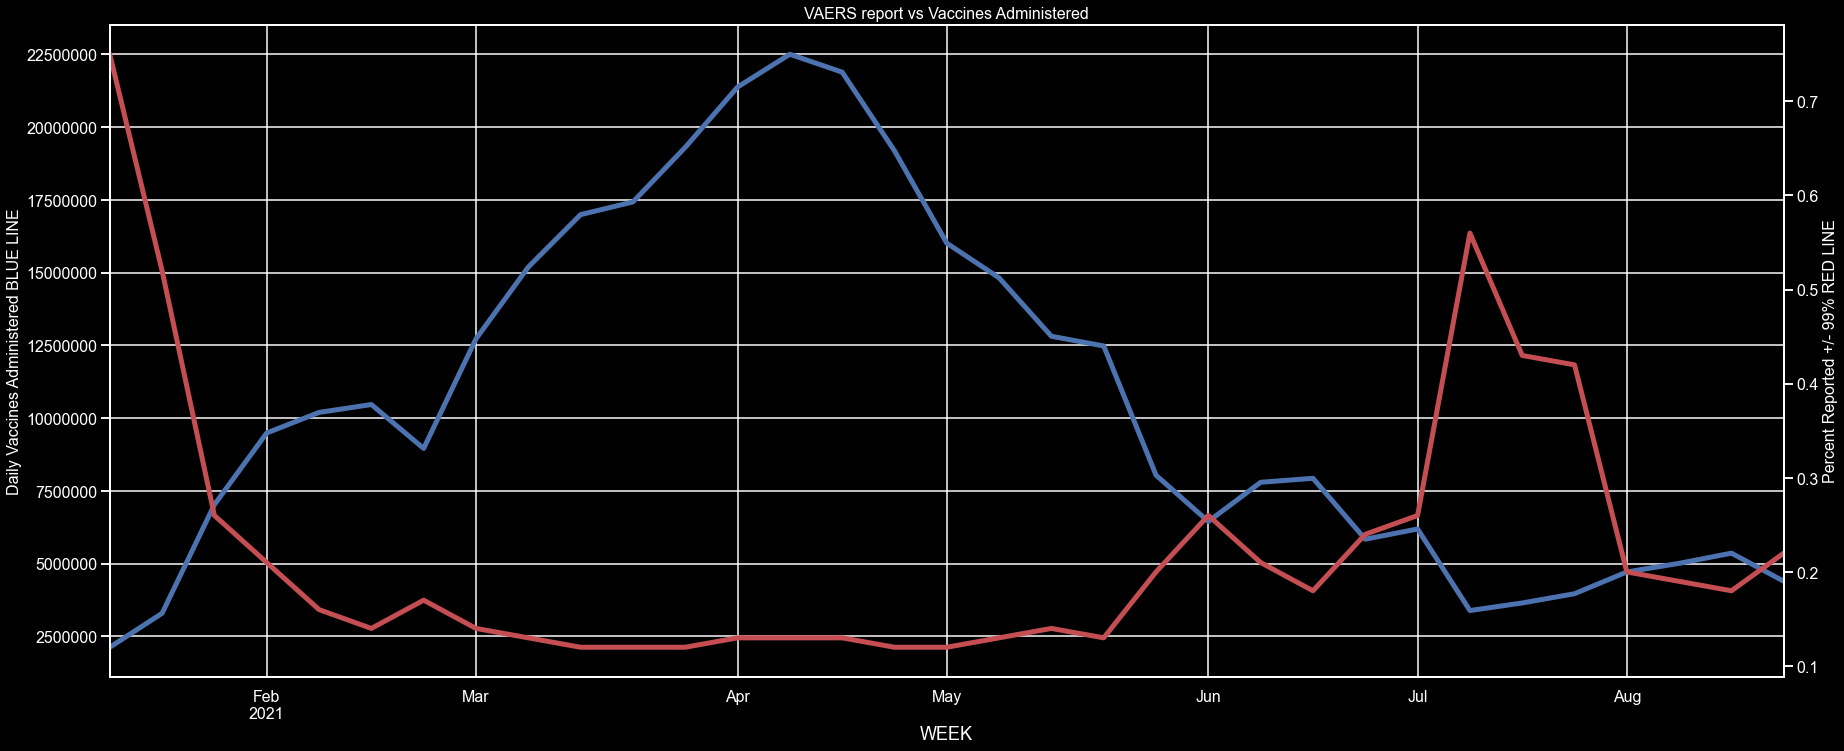

In [107]:
plt.figure(figsize=FIGSIZE3)
ax = V_PN['new_vaccinations'].plot(x='date', y='column1', linewidth=5, color='b')
ax.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Daily Vaccines Administered BLUE LINE', fontsize=16)
ax2 = ax.twinx()
plt.yticks(fontsize=16)
plt.title('VAERS report vs Vaccines Administered', fontsize=16)
plt.ylabel('Percent Reported +/- 99% RED LINE', fontsize=16)
ax2 = V_PN['percentage'].plot(x='date', y='column2', ax=ax2, color='r', linewidth=5)
plt.grid(None)
plt.show()